# Основной ноутбук с аналитикой метрик

In [127]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
def concat_csv_files(file_list):
    dataframes = []
    for file in file_list:
        df = pd.read_csv(file)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [129]:
df = concat_csv_files(['/content/rosbank_grupped_params_tun.csv'])

In [130]:
df

batch_size  learning_rate  split_count  cnt_min  cnt_max  embedding_dim  \
0            16          0.001            3       10       50             16   
1            16          0.001            3       10       50             16   
2            16          0.001            3       10       50             16   
3            16          0.001            3       10       50             16   
4            16          0.001            3       10       50             16   
..          ...            ...          ...      ...      ...            ...   
575          64          0.001            3       10       50             16   
576          64          0.001            3       10       50             16   
577          64          0.001            3       10       50             16   
578          64          0.001            3       10       50             16   
579          64          0.001            3       10       50             16   

     category_embedding_dim  hidden_size  \
0                         8          128   
1                         8          128   
2                         8          128   
3                         8          128   
4                         8          128   
..                      ...          ...   
575                       8         1024   
576                       8         1024   
577                       8         1024   
578                       8         1024   
579                       8         1024   

                                            checkpoint  epoch_num  ...  \
0    checkpoints/model_16_0.001_3_10_50_128epoch=00...          0  ...   
1    checkpoints/model_16_0.001_3_10_50_128epoch=01...          1  ...   
2    checkpoints/model_16_0.001_3_10_50_128epoch=02...          2  ...   
3    checkpoints/model_16_0.001_3_10_50_128epoch=03...          3  ...   
4    checkpoints/model_16_0.001_3_10_50_128epoch=04...          4  ...   
..                                                 ...        ...  ...   
575  checkpoints/model_64_0.001_3_10_50_1024epoch=1...         18  ...   
576  checkpoints/model_64_0.001_3_10_50_1024epoch=1...         19  ...   
577  checkpoints/model_64_0.001_3_10_50_1024epoch=2...         20  ...   
578  checkpoints/model_64_0.001_3_10_50_1024epoch=2...         21  ...   
579  checkpoints/model_64_0.001_3_10_50_1024epoch=2...         22  ...   

     metric_self_clustering  metric_ripser  time_rankme  time_coherence  \
0                    0.6088     -3174.8346       0.0023          0.0006   
1                    0.6059     -3841.7036       0.0001          0.0006   
2                    0.6224     -4421.2961       0.0001          0.0006   
3                    0.6645     -4734.2633       0.0001          0.0006   
4                    0.6578     -5143.1358       0.0001          0.0006   
..                      ...            ...          ...             ...   
575                  0.6888     -9053.0727       0.0001          0.0043   
576                  0.6793     -9379.8099       0.0001          0.0033   
577                  0.6806     -9467.0730       0.0004          0.0032   
578                  0.6769     -9623.7961       0.0001          0.0043   
579                  0.6684     -9774.3154       0.0001          0.0031   

     time_pseudo_condition_number  time_alpha_req  time_stable_rank  \
0                             0.0          0.0053            0.0026   
1                             0.0          0.0002            0.0004   
2                             0.0          0.0002            0.0004   
3                             0.0          0.0002            0.0004   
4                             0.0          0.0002            0.0004   
..                            ...             ...               ...   
575                           0.0          0.0003            0.0041   
576                           0.0          0.0003            0.0028   
577                           0.0          0.0003            0.0029   
578            

## RankMe: корреляция с accuracy и гиперпараметрами

In [131]:
print(f"correlation rankme and accuracy is {df['metric_rankme'].corr(df['accuracy'])}")

correlation rankme and accuracy is 0.45202665091066824


In [132]:
hyperparameters = ["batch_size", "learning_rate", "split_count", "cnt_min", "cnt_max"]

rankme_accuracy_corr, rankme_accuracy_pval = stats.pearsonr(df["metric_rankme"], df["accuracy"])
print(f"Correlation between RankMe and Accuracy: {rankme_accuracy_corr:.4f}")
print(f"P-value: {rankme_accuracy_pval:.4e}\n")

for param in hyperparameters:
    corr, pval = stats.pearsonr(df["metric_rankme"], df[param])
    print(f"Correlation between RankMe and {param}: {corr:.4f}")
    print(f"P-value: {pval:.4e}\n")

Correlation between RankMe and Accuracy: 0.4520
P-value: 1.4959e-30

Correlation between RankMe and batch_size: -0.0236
P-value: 5.7042e-01

Correlation between RankMe and learning_rate: -0.0559
P-value: 1.7890e-01

Correlation between RankMe and split_count: -0.0161
P-value: 6.9867e-01

Correlation between RankMe and cnt_min: 0.0047
P-value: 9.1027e-01

Correlation between RankMe and cnt_max: -0.0777
P-value: 6.1329e-02



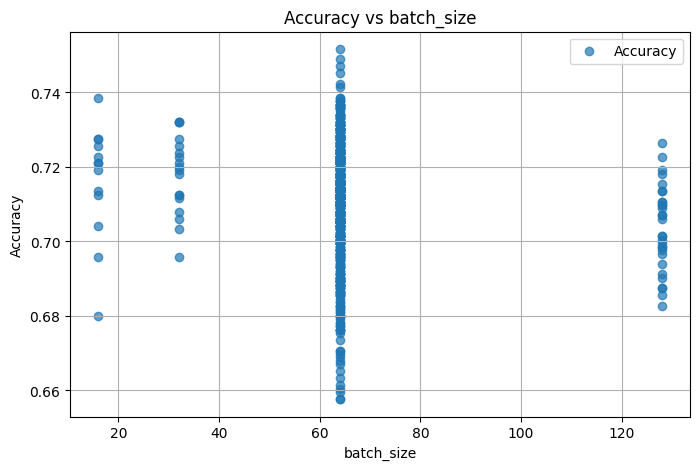

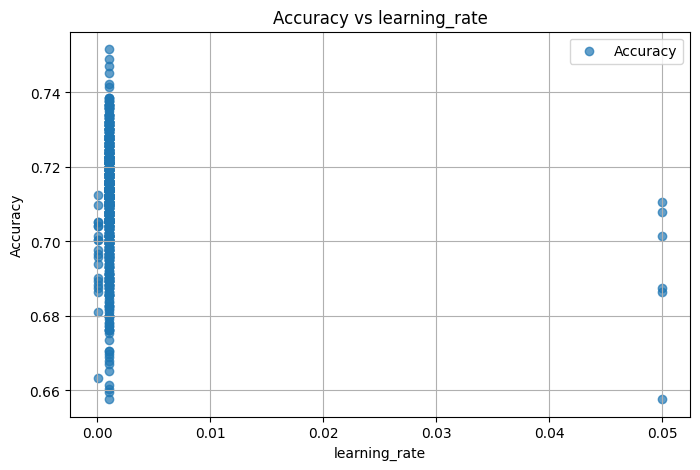

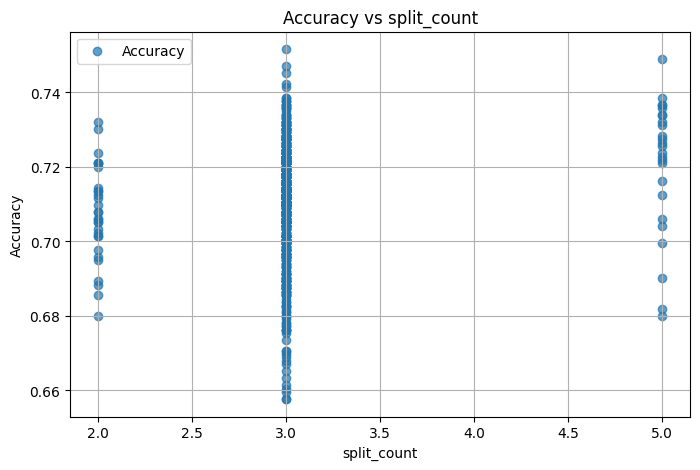

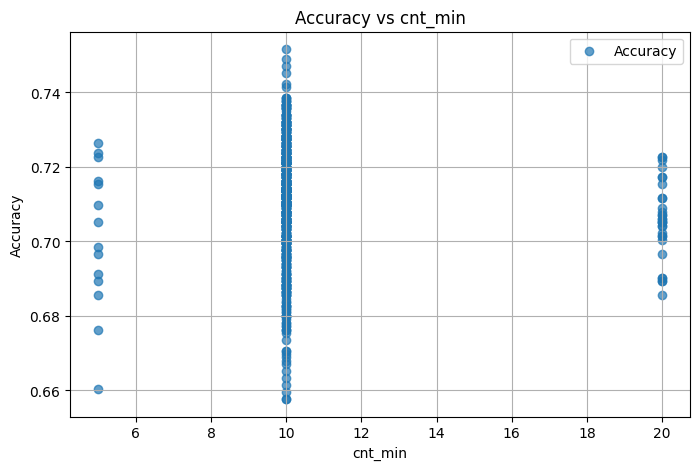

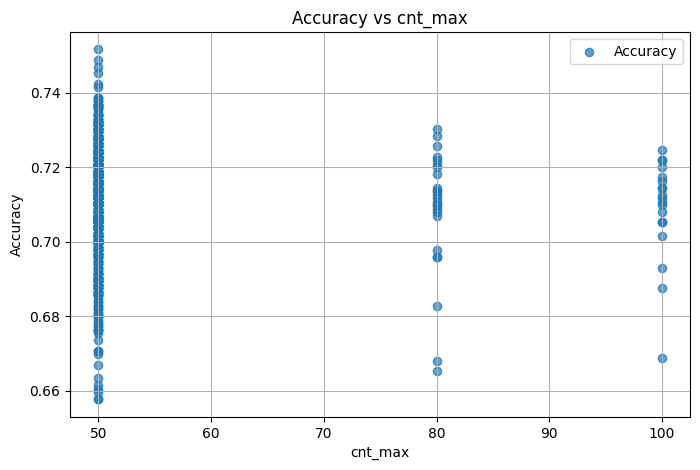

In [133]:
hyperparameters = ["batch_size", "learning_rate", "split_count", "cnt_min", "cnt_max"]

for param in hyperparameters:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[param], df["accuracy"], alpha=0.7, label="Accuracy")
    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs {param}")
    plt.grid(True)
    plt.legend()
    plt.show()

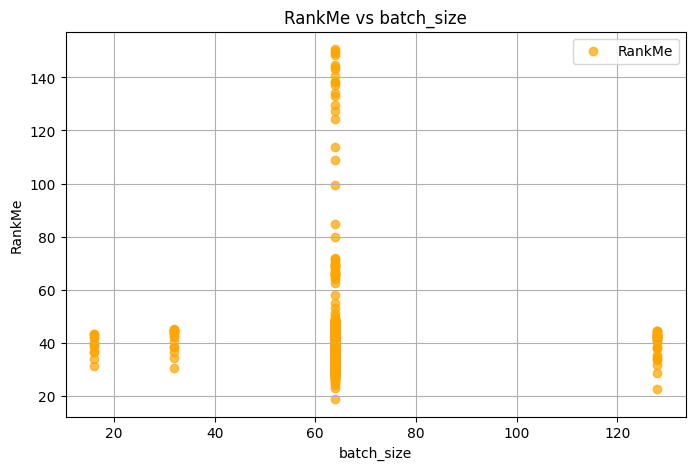

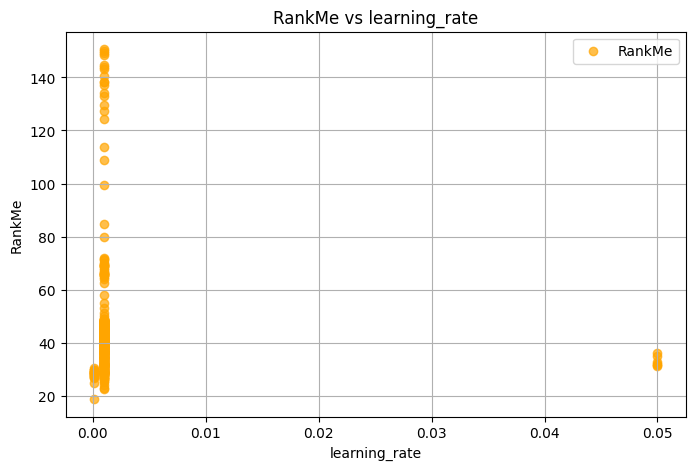

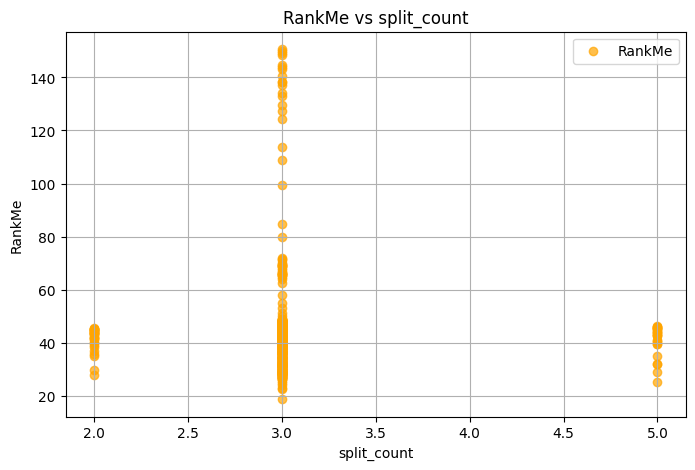

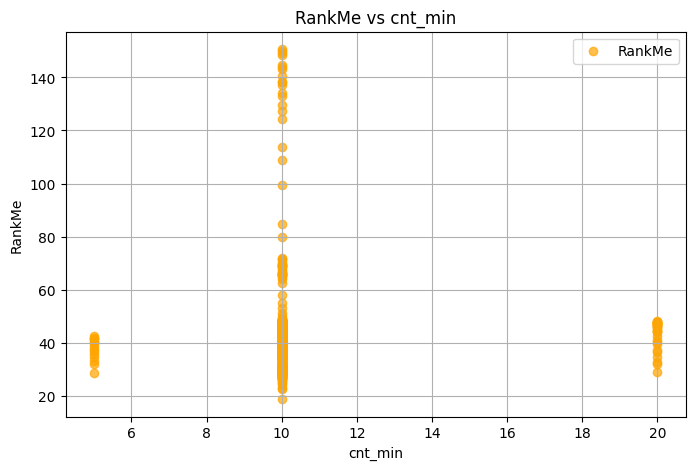

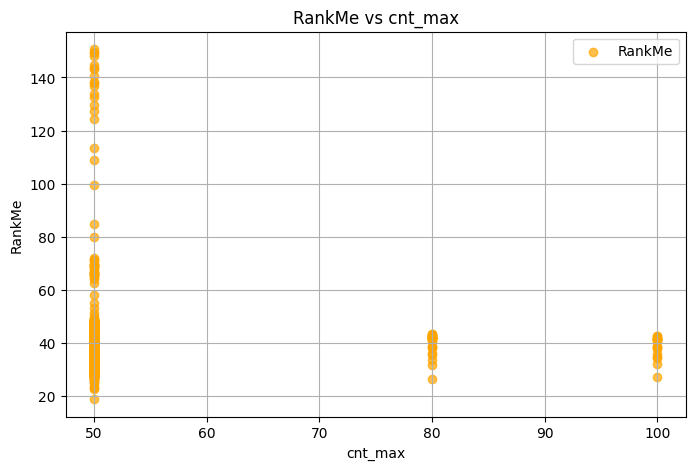

In [134]:
for param in hyperparameters:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[param], df["metric_rankme"], alpha=0.7, label="RankMe", color="orange")
    plt.xlabel(param)
    plt.ylabel("RankMe")
    plt.title(f"RankMe vs {param}")
    plt.grid(True)
    plt.legend()
    plt.show()

## Как размер скрытого состояния влияет на метрики

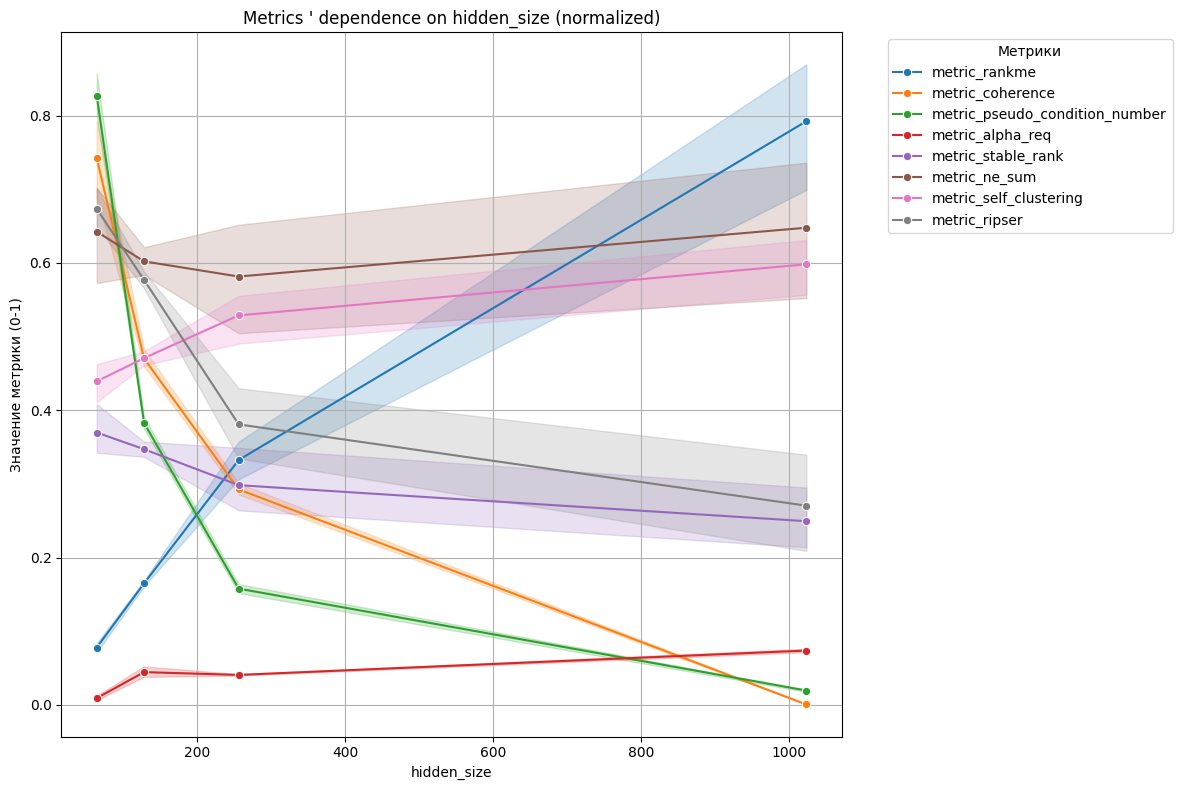

In [135]:
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(12, 8))

metric_columns = [col for col in df.columns if col.startswith("metric_")]

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[metric_columns] = scaler.fit_transform(df[metric_columns])

for metric in metric_columns:
    # if metric == "metric_ripser":

    sns.lineplot(data=df_scaled, x="hidden_size", y=metric, marker="o", label=metric)

plt.title("Metrics ' dependence on hidden_size (normalized)")
plt.xlabel("hidden_size")
plt.ylabel("Значение метрики (0-1)")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1), title="Метрики")
plt.grid(True)
plt.tight_layout()
plt.show()

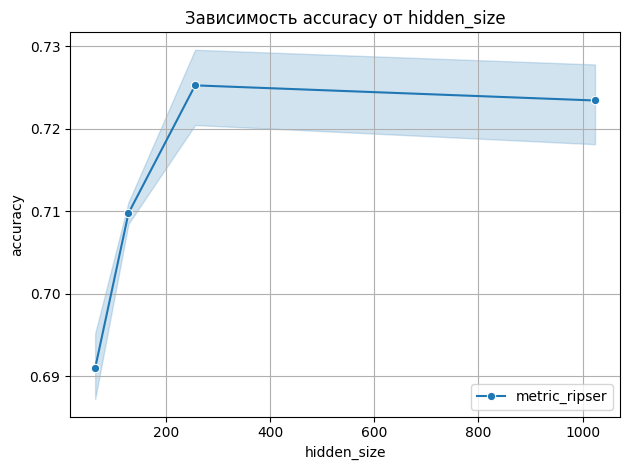

In [136]:
sns.lineplot(data=df, x="hidden_size", y='accuracy', marker="o", label=metric)

# Настройки графика
plt.title("Зависимость accuracy от hidden_size")
plt.xlabel("hidden_size")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

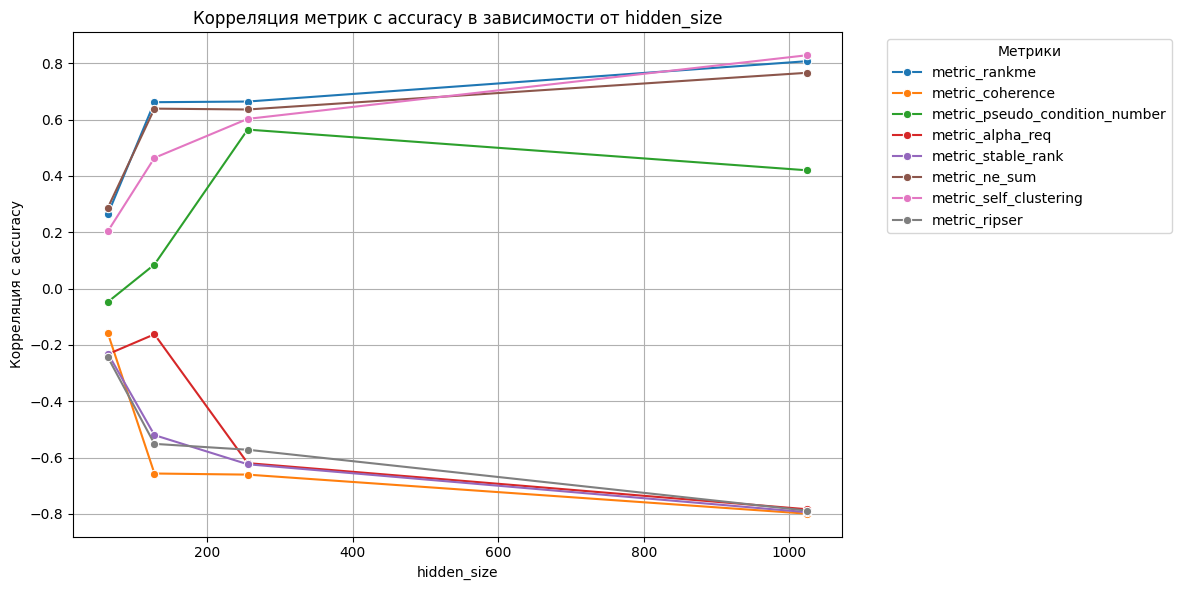

In [ ]:
metric_columns = [col for col in df.columns if col.startswith("metric_")]


correlation_results = []


hidden_sizes = sorted(df["hidden_size"].unique())


for h_size in hidden_sizes:
    subset = df[df["hidden_size"] == h_size]
    row = {"hidden_size": h_size}

    for metric in metric_columns:
        if len(subset) > 1:  
            corr, pval = stats.pearsonr(subset[metric], subset["accuracy"])
            row[metric] = corr
        else:
            row[metric] = None  

    correlation_results.append(row)


corr_df = pd.DataFrame(correlation_results)


plt.figure(figsize=(12, 6))

for metric in metric_columns:
    sns.lineplot(data=corr_df, x="hidden_size", y=metric, marker="o", label=metric)

plt.title("Корреляция метрик с accuracy в зависимости от hidden_size")
plt.xlabel("hidden_size")
plt.ylabel("Корреляция с accuracy")
plt.legend(title="Метрики", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

### RankMe и гиперпараметры

In [138]:
import pandas as pd
import scipy.stats as stats

# Инициализируем список для хранения результатов корреляции
correlation_results = []

problem_cases = []

# Группировка по уникальным наборам гиперпараметров
grouped = df.groupby(["batch_size", "learning_rate", "split_count", "cnt_min", "cnt_max"])

# Вычисляем корреляцию для каждой метрики
metric_columns = [col for col in df.columns if col.startswith("metric_")]

# Итерация по каждой группе гиперпараметров
for params, group in grouped:
    result = {
        "batch_size": params[0],
        "learning_rate": params[1],
        "split_count": params[2],
        "cnt_min": params[3],
        "cnt_max": params[4],
    }

    # Вычисление корреляции каждой метрики с accuracy
    for metric in metric_columns:
        if group[metric].nunique() <= 1 or group["accuracy"].nunique() <= 1:
          problem_cases.append({
                    "metric": metric,
                    "batch_size": params[0],
                    "learning_rate": params[1],
                    "split_count": params[2],
                    "cnt_min": params[3],
                    "cnt_max": params[4],
                    "metric_values": group[metric].tolist(),
                    "accuracy_values": group["accuracy"].tolist()
                })

          break
        if len(group) > 1:  # Проверяем, что данных достаточно для расчета корреляции
            corr, pval = stats.pearsonr(group[metric], group["accuracy"])
        else:
            corr, pval = None, None  # Если недостаточно данных, оставляем пустые значения

            problem_cases.append({
                    "metric": metric,
                    "batch_size": params[0],
                    "learning_rate": params[1],
                    "split_count": params[2],
                    "cnt_min": params[3],
                    "cnt_max": params[4],
                    "metric_values": group[metric].tolist(),
                    "accuracy_values": group["accuracy"].tolist()
                })

            break

        if corr is None:
          print(metric, result)
        result[f"correlation_{metric}"] = corr
        result[f"p_value_{metric}"] = pval

    # Добавляем результат в список
    correlation_results.append(result)

# Преобразуем список в DataFrame
df_correlation = pd.DataFrame(correlation_results)

# Отобразим DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Metric Correlations", dataframe=df_correlation)


In [139]:
problem_cases

[{'metric': 'metric_coherence',
  'batch_size': np.int64(64),
  'learning_rate': np.float64(0.05),
  'split_count': np.int64(3),
  'cnt_min': np.int64(10),
  'cnt_max': np.int64(50),
  'metric_values': [27.9766, 27.9766, 27.9766, 27.9766, 27.9766, 27.9766],
  'accuracy_values': [0.707906976744186,
   0.6874418604651162,
   0.7013953488372093,
   0.6576744186046511,
   0.6865116279069767,
   0.7106976744186047]}]

#### Визуализация корреляции между RankMe и гиперпараметрами

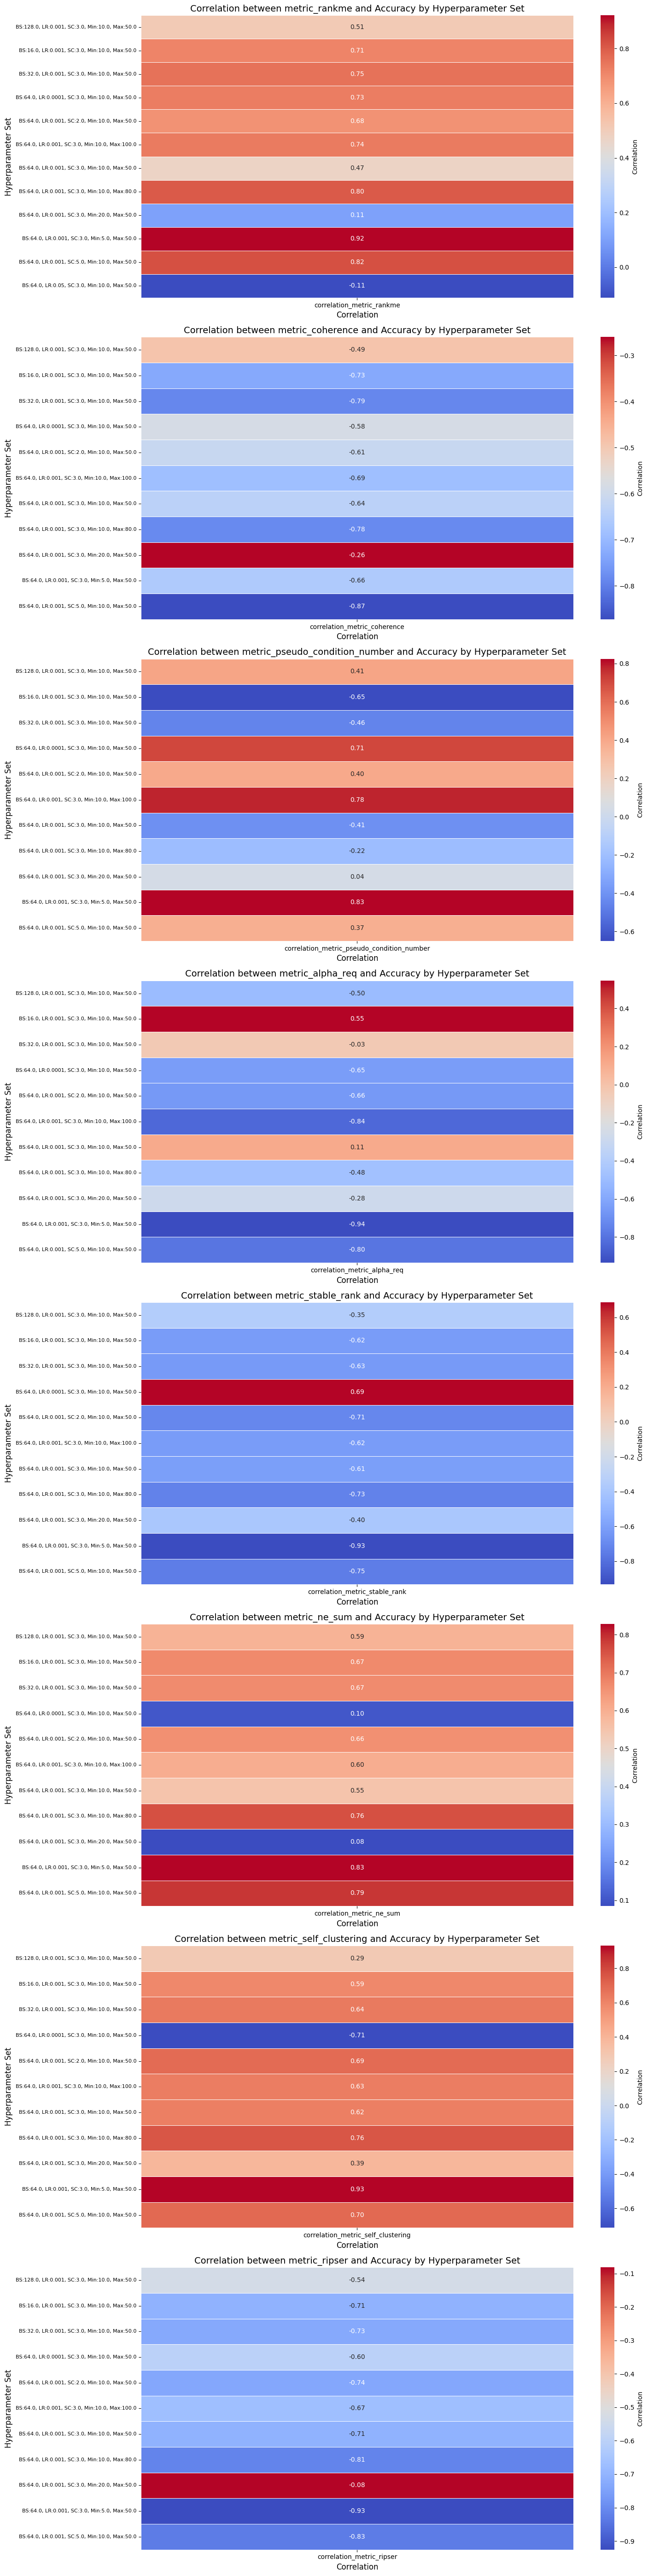

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание столбца с комбинацией гиперпараметров
df_correlation["hyperparameters"] = df_correlation.apply(
    lambda row: f"BS:{row['batch_size']}, LR:{row['learning_rate']}, SC:{row['split_count']}, Min:{row['cnt_min']}, Max:{row['cnt_max']}",
    axis=1
)

# Список метрик (из существующих столбцов)
metrics = [
    "metric_rankme", "metric_coherence", "metric_pseudo_condition_number",
    "metric_alpha_req", "metric_stable_rank", "metric_ne_sum",
    "metric_self_clustering", "metric_ripser"
]

# Построение тепловой карты для каждой метрики
fig, axes = plt.subplots(nrows=len(metrics), figsize=(15, 7 * len(metrics)))

for i, metric in enumerate(metrics):
    ax = axes[i]
    pivot_table = df_correlation.pivot_table(
        index="hyperparameters", values=f"correlation_{metric}", aggfunc="mean"
    )

    sns.heatmap(
        pivot_table,
        annot=True,
        cmap="coolwarm",
        cbar_kws={"label": "Correlation"},
        ax=ax,
        fmt=".2f",  # Формат чисел
        linewidths=0.5  # Разделительные линии
    )

    ax.set_title(f"Correlation between {metric} and Accuracy by Hyperparameter Set", fontsize=14)
    ax.set_ylabel("Hyperparameter Set", fontsize=12)
    ax.set_xlabel("Correlation", fontsize=12)
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=8)

plt.tight_layout()
plt.show()

In [141]:
correlation_df = df_correlation

In [142]:
correlation_df.isna().sum()

batch_size                                    0
learning_rate                                 0
split_count                                   0
cnt_min                                       0
cnt_max                                       0
correlation_metric_rankme                     0
p_value_metric_rankme                         0
correlation_metric_coherence                  1
p_value_metric_coherence                      1
correlation_metric_pseudo_condition_number    1
p_value_metric_pseudo_condition_number        1
correlation_metric_alpha_req                  1
p_value_metric_alpha_req                      1
correlation_metric_stable_rank                1
p_value_metric_stable_rank                    1
correlation_metric_ne_sum                     1
p_value_metric_ne_sum                         1
correlation_metric_self_clustering            1
p_value_metric_self_clustering                1
correlation_metric_ripser                     1
p_value_metric_ripser                         1
hyperparameters                               0
dtype: int64

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


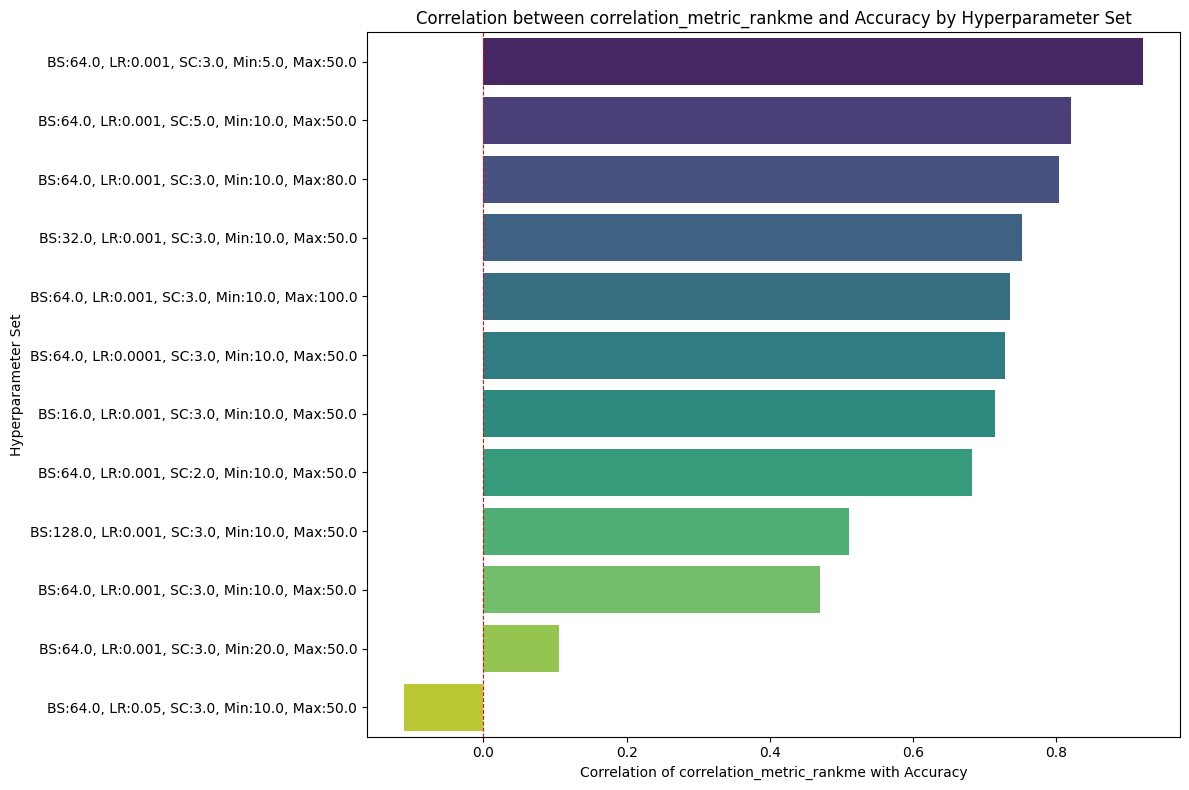

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


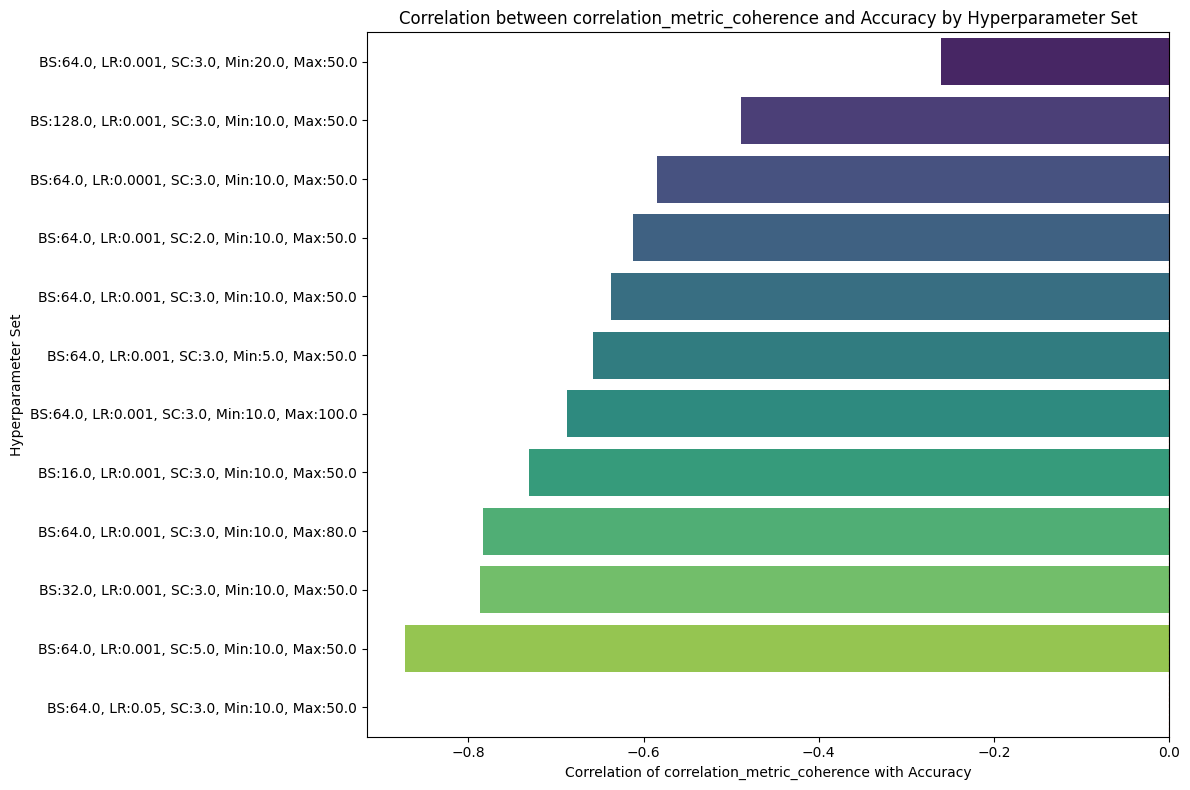

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


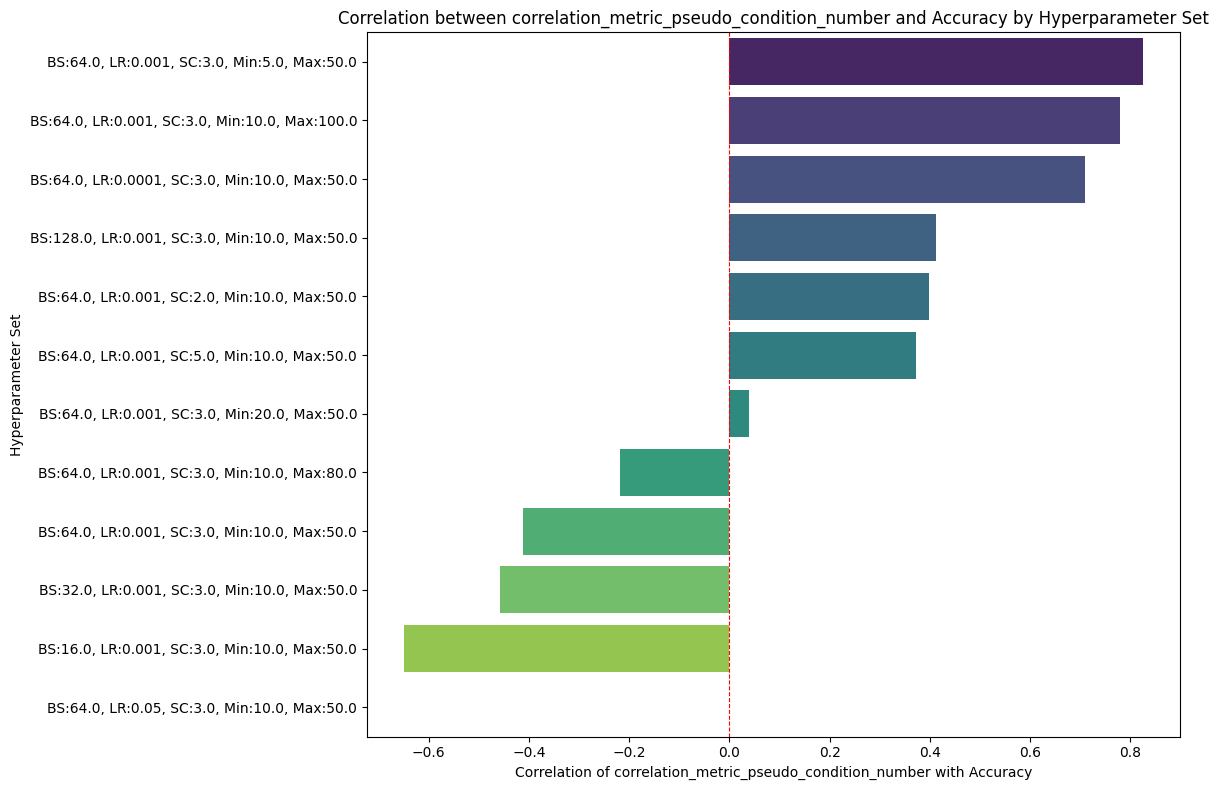

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


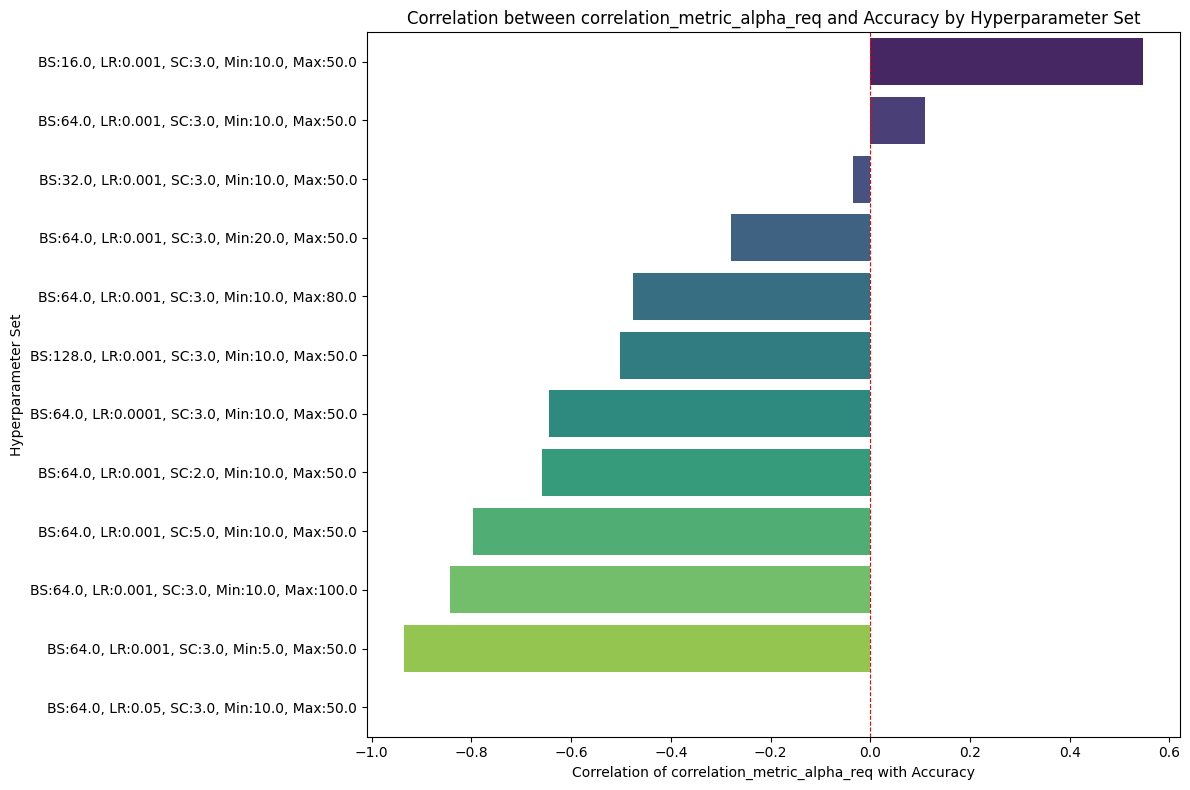

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


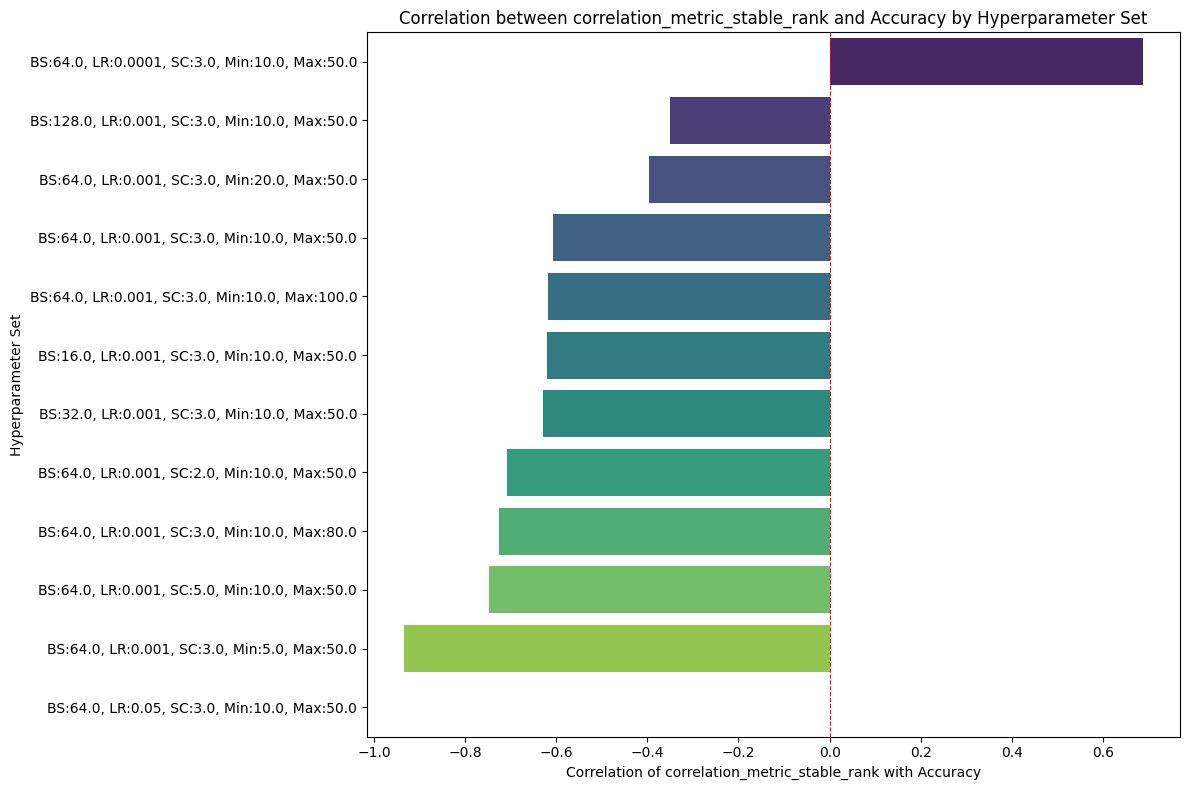

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


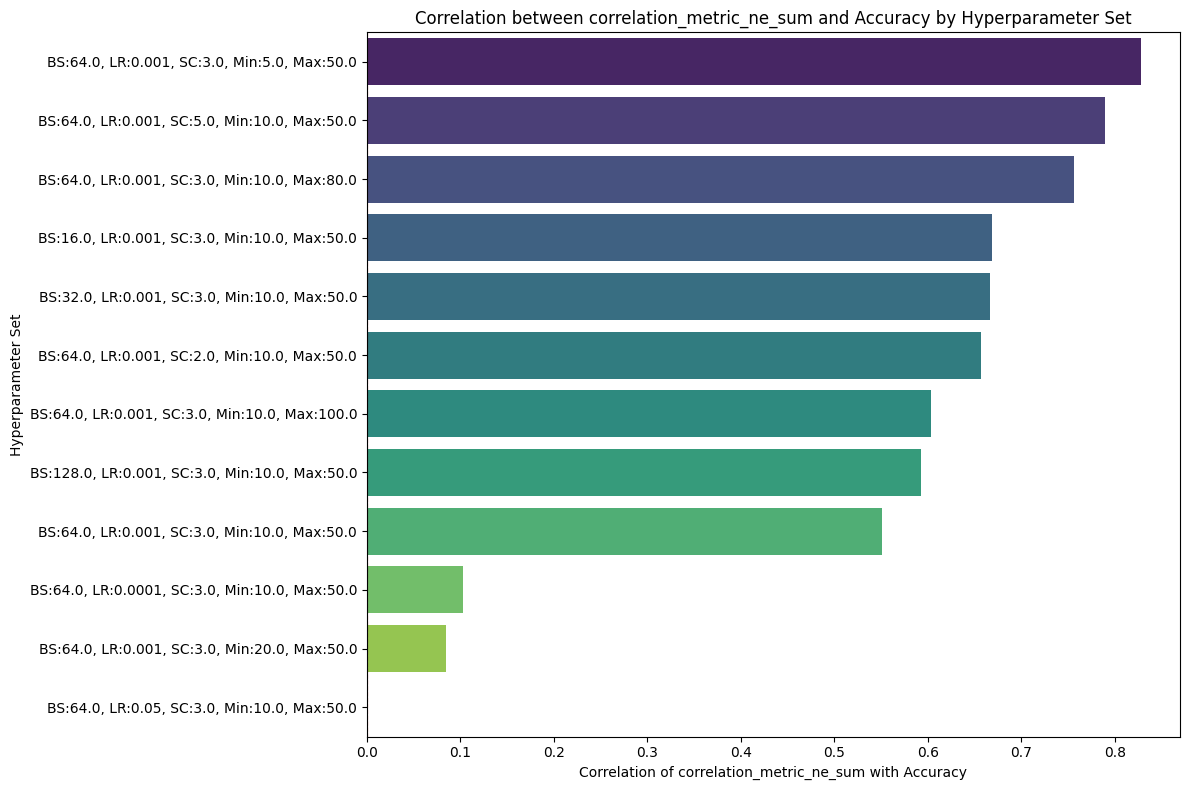

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


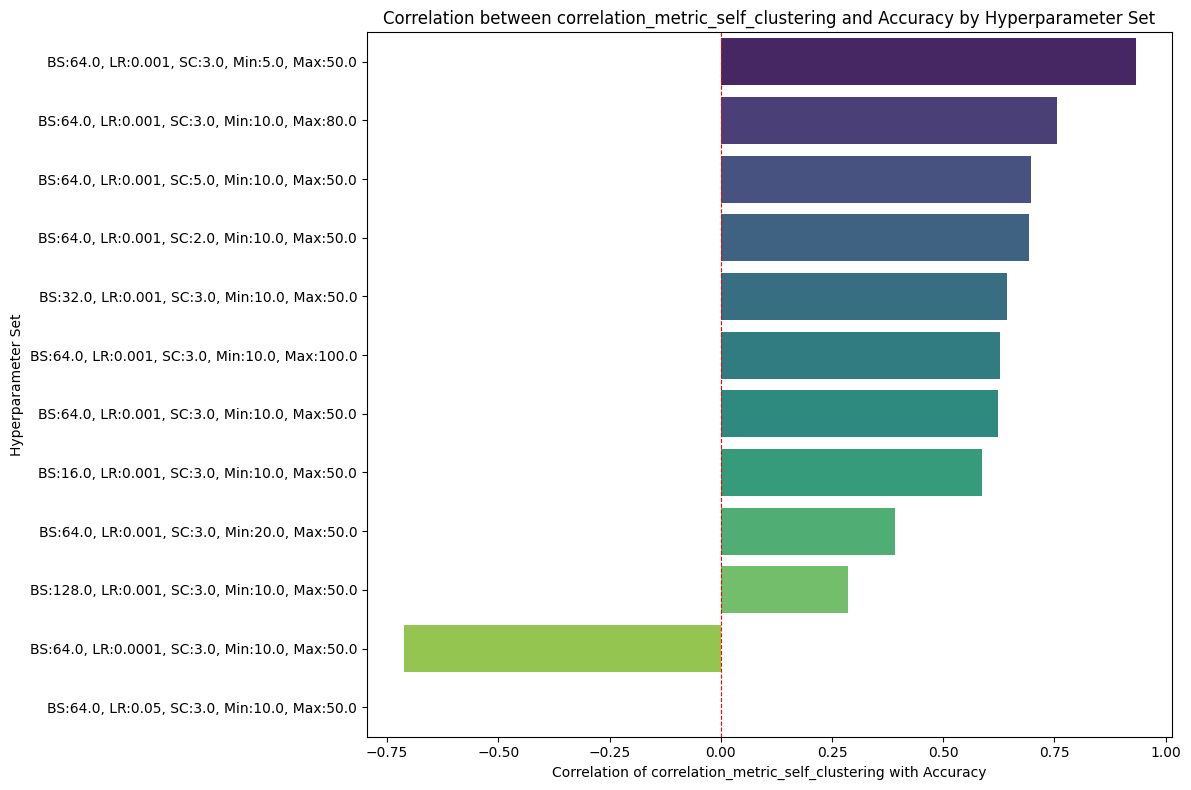

<ipython-input-143-a3b7a40b21ce>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


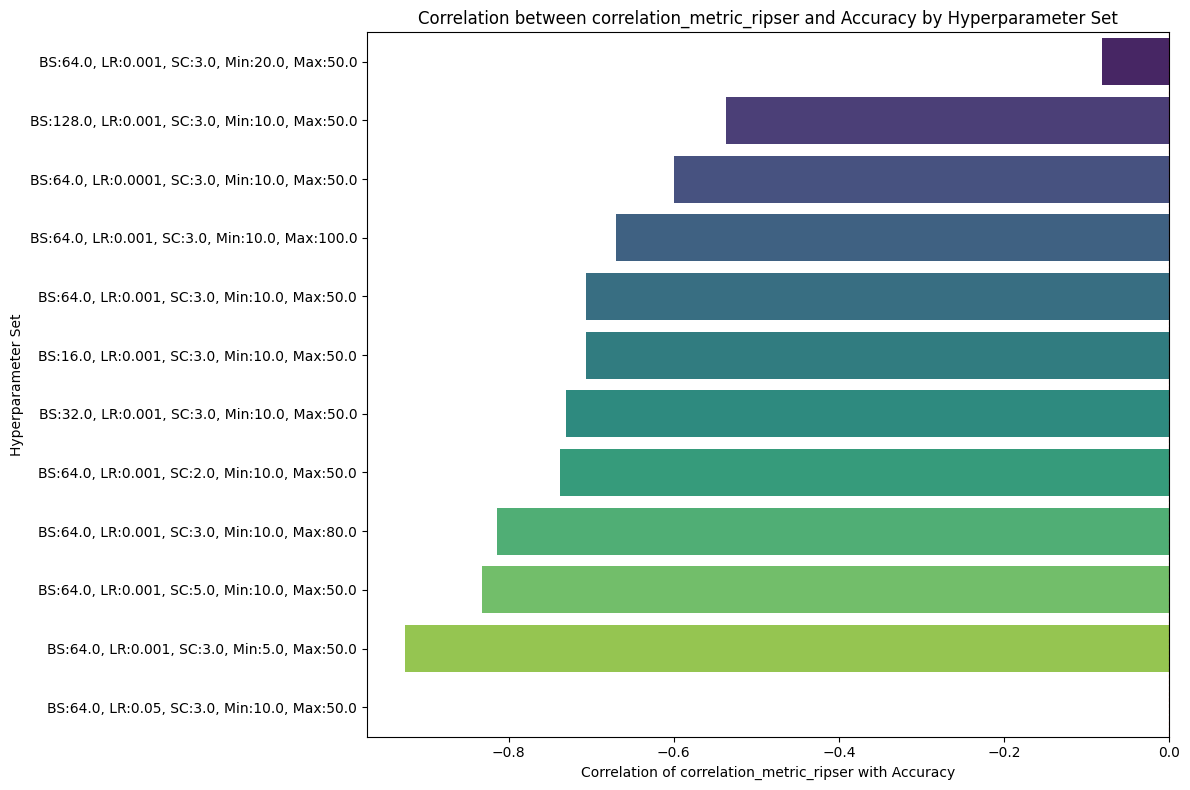

In [143]:
metric_columns = [col for col in correlation_df.columns if "correlation_metric" in col]

# Создаем графики для каждой метрики
for metric in metric_columns:
    plt.figure(figsize=(12, 8))

    # Отбираем данные для текущей метрики
    df_sorted = correlation_df.sort_values(metric, ascending=False)

    # Строим график
    sns.barplot(
        data=df_sorted,
        y="hyperparameters",
        x=metric,
        palette="viridis"
    )

    plt.axvline(0, color="red", linestyle="--", linewidth=0.8)  # Линия для нуля
    plt.title(f"Correlation between {metric} and Accuracy by Hyperparameter Set")
    plt.xlabel(f"Correlation of {metric} with Accuracy")
    plt.ylabel("Hyperparameter Set")
    plt.tight_layout()

    # Показываем график
    plt.show()

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Загружаем DataFrame (замени df на свой реальный DataFrame)
# df = pd.read_csv("optimized_metrics_and_hyperparameter_results.csv")

# Определяем столбцы с гиперпараметрами и метриками
hyperparams = ["batch_size", "learning_rate", "split_count", "cnt_min", "cnt_max", ]
metrics = ["metric_rankme", "metric_coherence", "metric_pseudo_condition_number",
           "metric_alpha_req", "metric_stable_rank", "metric_ne_sum", "metric_self_clustering"]

# Храним корреляцию по разным эпохам
correlations = []

# Группируем по эпохе и считаем корреляцию
for epoch, epoch_df in df.groupby("epoch_num"):
    for metric in metrics:
        for param in hyperparams:
            # Проверяем, есть ли уникальные значения (иначе Pearson выдаст ошибку)
            if epoch_df[metric].nunique() > 1 and epoch_df[param].nunique() > 1:
                corr, pval = pearsonr(epoch_df[metric], epoch_df[param])
                correlations.append({"epoch": epoch, "metric": metric, "hyperparam": param, "correlation": corr, "p-value": pval})

# Преобразуем в DataFrame
df_corr = pd.DataFrame(correlations)

In [145]:
df_corr

epoch                  metric     hyperparam  correlation   p-value
0        0           metric_rankme     batch_size    -0.225656  0.267685
1        0           metric_rankme  learning_rate     0.081672  0.691639
2        0           metric_rankme    split_count    -0.094733  0.645281
3        0           metric_rankme        cnt_min     0.011232  0.956570
4        0           metric_rankme        cnt_max    -0.111570  0.587394
..     ...                     ...            ...          ...       ...
940     29           metric_ne_sum    split_count     0.346143  0.568243
941     29           metric_ne_sum        cnt_min     0.046144  0.941268
942     29  metric_self_clustering     batch_size    -0.409947  0.493052
943     29  metric_self_clustering    split_count     0.319229  0.600558
944     29  metric_self_clustering        cnt_min    -0.488406  0.403836

[945 rows x 5 columns]

Calculating correlation for batch_size while fixing others...
Calculating correlation for learning_rate while fixing others...
Calculating correlation for split_count while fixing others...
Calculating correlation for cnt_min while fixing others...
Calculating correlation for cnt_max while fixing others...


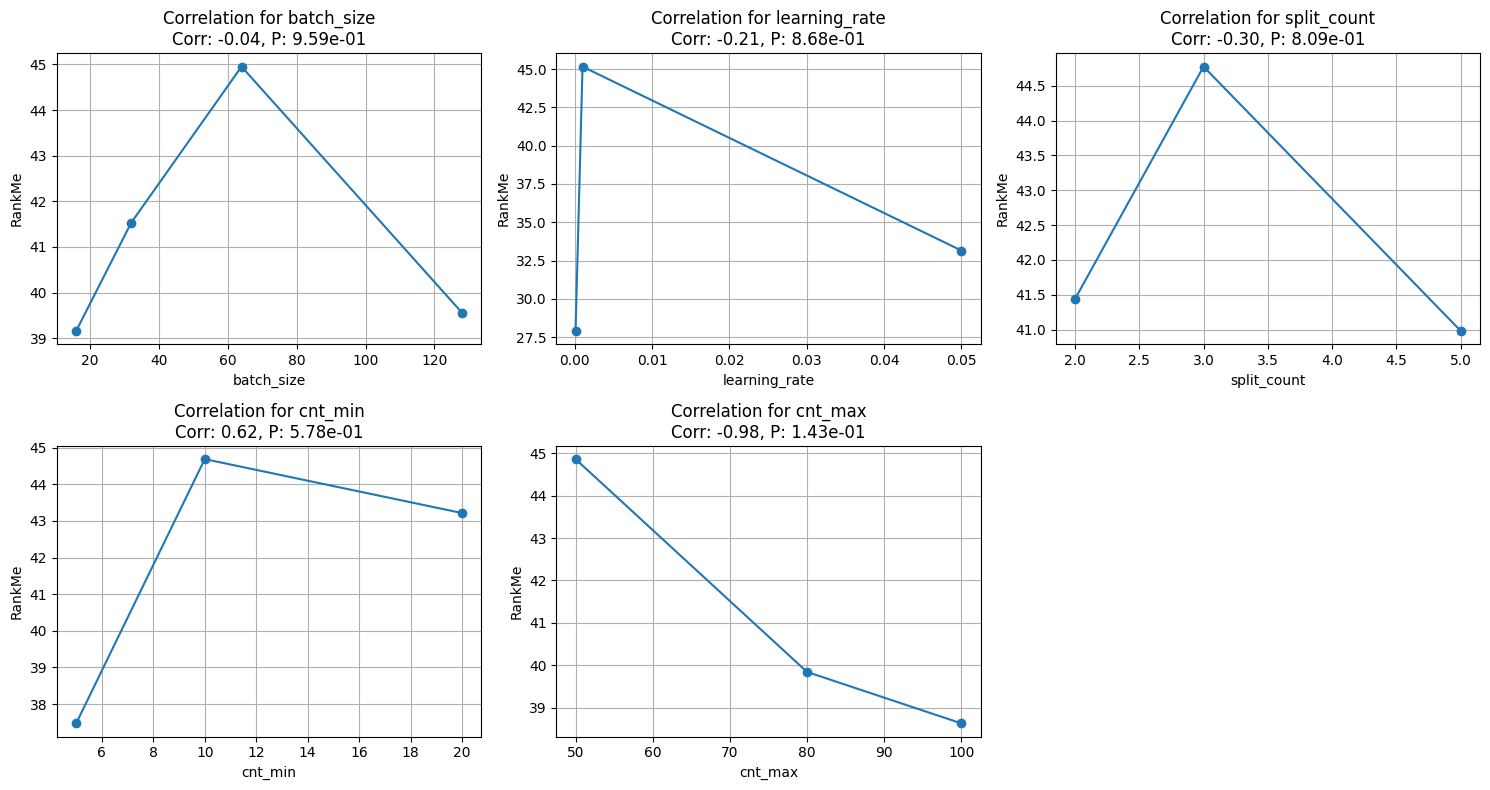

In [146]:
fixed_correlations = {}

for fixed_param in hyperparameters:
    print(f"Calculating correlation for {fixed_param} while fixing others...")

    grouped_data = df.groupby(fixed_param).agg({"metric_rankme": "mean"}).reset_index()

    grouped_data = grouped_data.dropna()

    if len(grouped_data) < 2:
        print(f"Not enough data for {fixed_param}. Skipping...")
        continue

    # Рассчитываем корреляцию между фиксированным параметром и RankMe
    corr, pval = stats.pearsonr(grouped_data[fixed_param], grouped_data["metric_rankme"])

    # Сохраняем результаты
    fixed_correlations[fixed_param] = {
        "correlation": corr,
        "p_value": pval,
        "data": grouped_data
    }

plt.figure(figsize=(15, 8))

for i, (param, results) in enumerate(fixed_correlations.items(), 1):
    if param not in results["data"]:
      continue
    data = results["data"]
    plt.subplot(2, 3, i)
    plt.plot(data[param], data["metric_rankme"], marker="o")
    plt.title(f"Correlation for {param}\nCorr: {results['correlation']:.2f}, P: {results['p_value']:.2e}")
    plt.xlabel(param)
    plt.ylabel("RankMe")
    plt.grid()

plt.tight_layout()
plt.show()

### Ищем лучшй набор гиперпараметров

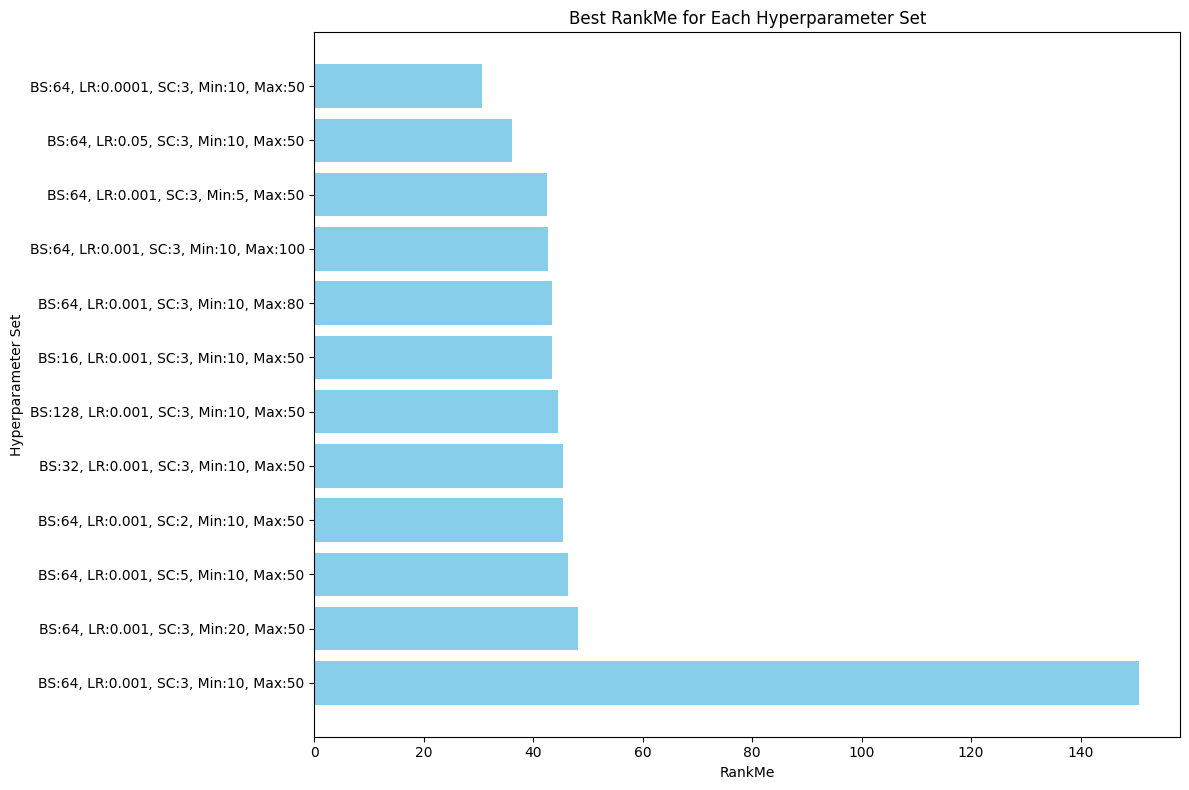

In [147]:
df["hyperparam_set"] = df.apply(
    lambda row: f"BS:{row['batch_size']}, LR:{row['learning_rate']}, SC:{row['split_count']}, Min:{row['cnt_min']}, Max:{row['cnt_max']}",
    axis=1
)

grouped = df.groupby("hyperparam_set")["metric_rankme"].max().reset_index()

grouped = grouped.sort_values("metric_rankme", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(grouped["hyperparam_set"], grouped["metric_rankme"], color="skyblue")
plt.xlabel("RankMe")
plt.ylabel("Hyperparameter Set")
plt.title("Best RankMe for Each Hyperparameter Set")
plt.tight_layout()
plt.show()

## Возьмем расширенный набор метрик

In [148]:
metrics = [
    "metric_rankme",
    "metric_coherence",
    "metric_pseudo_condition_number",
    "metric_alpha_req",
    "metric_stable_rank",
    "metric_ne_sum",
    "metric_self_clustering",
    "metric_ripser"
]

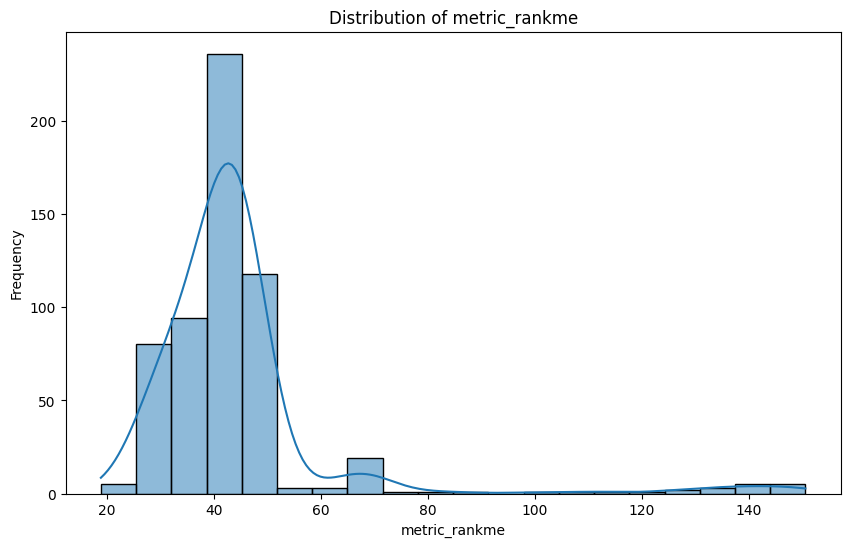

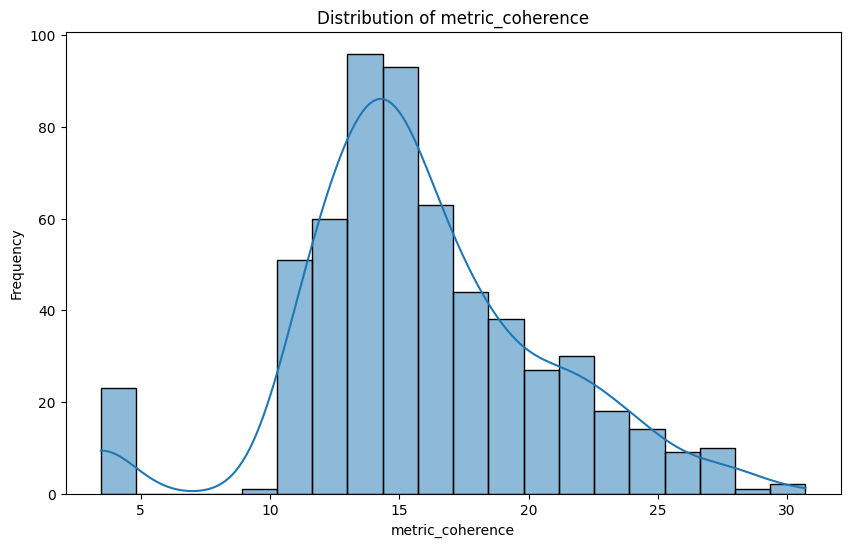

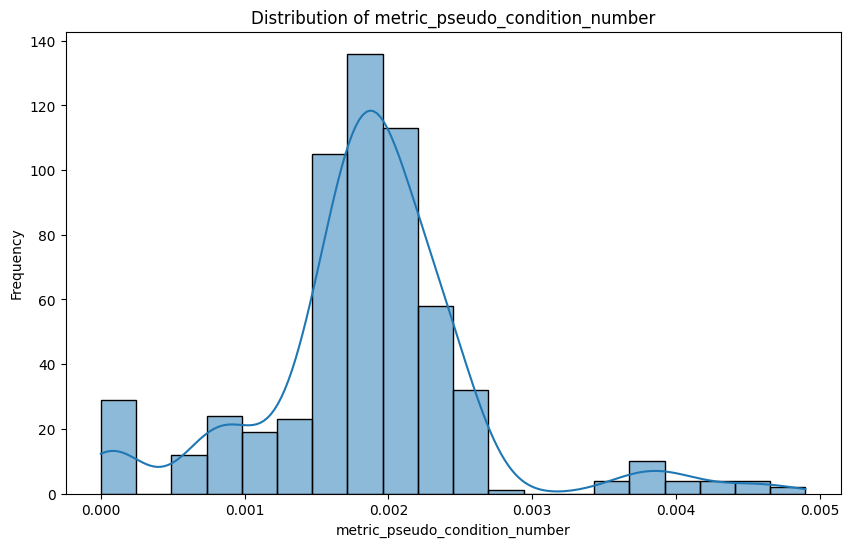

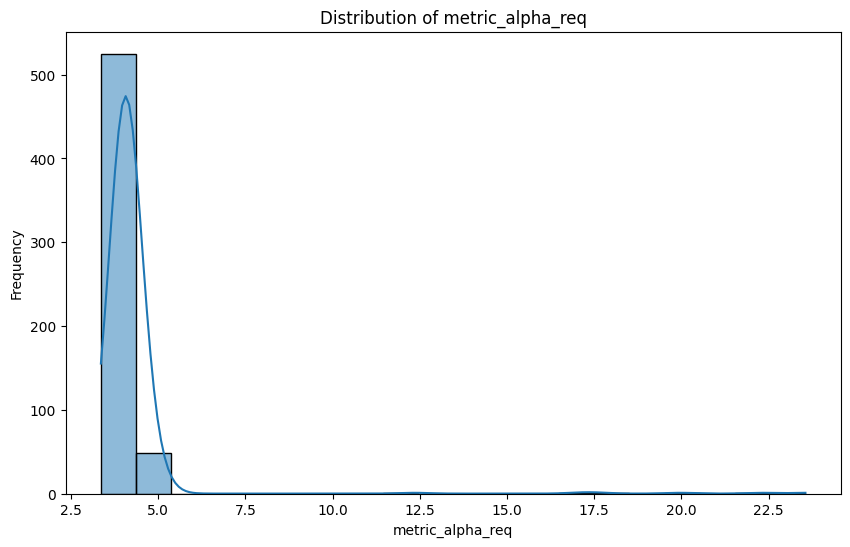

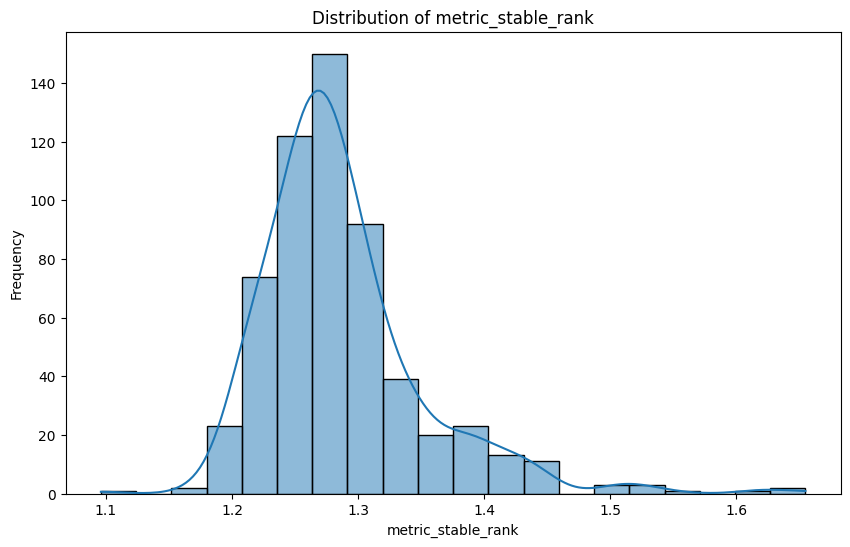

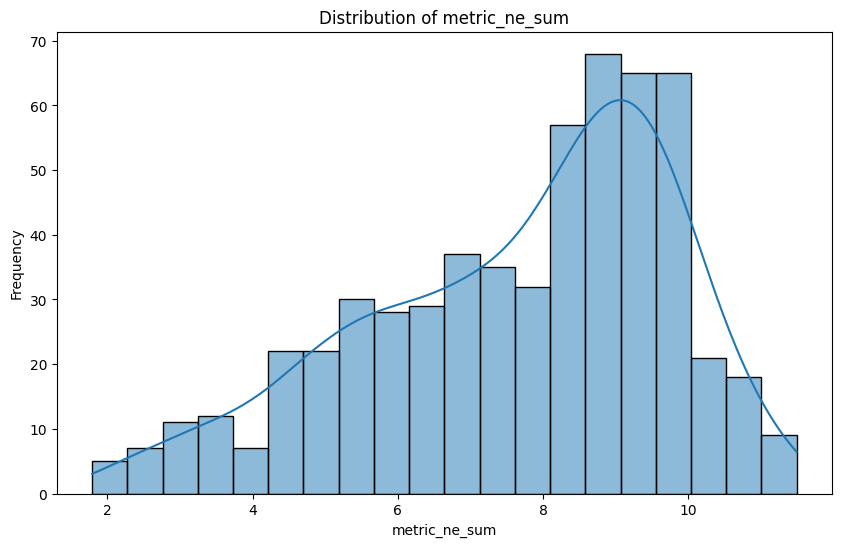

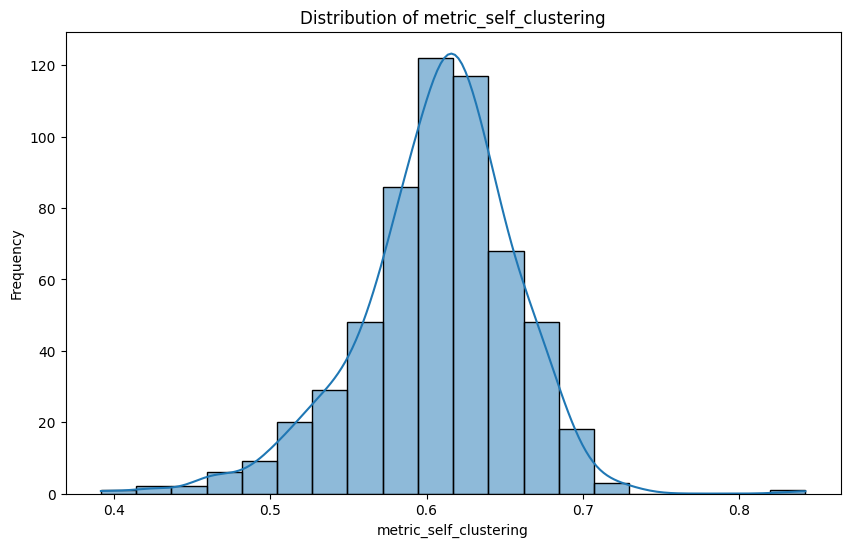

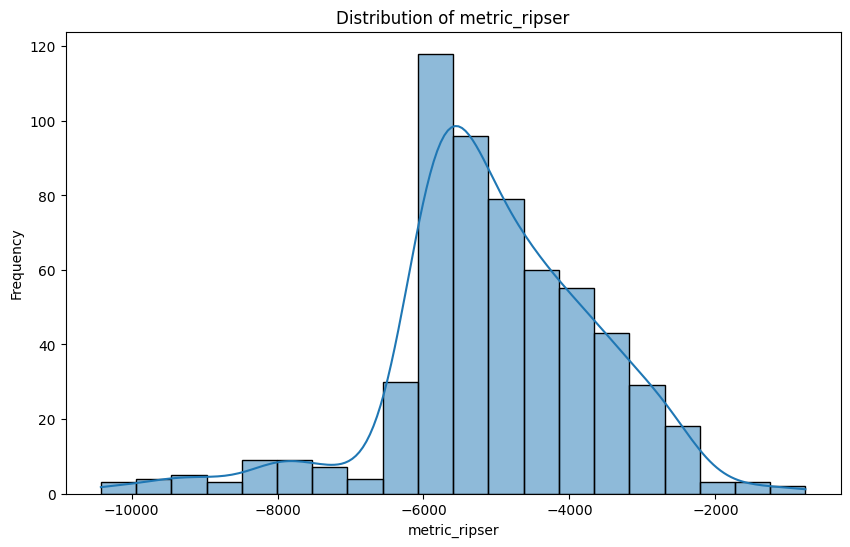

In [149]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[metric], kde=True, bins=20)
    plt.title(f"Distribution of {metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.show()

Вот тут корреляция (ранговая и обычная) всех метрик с accurcy

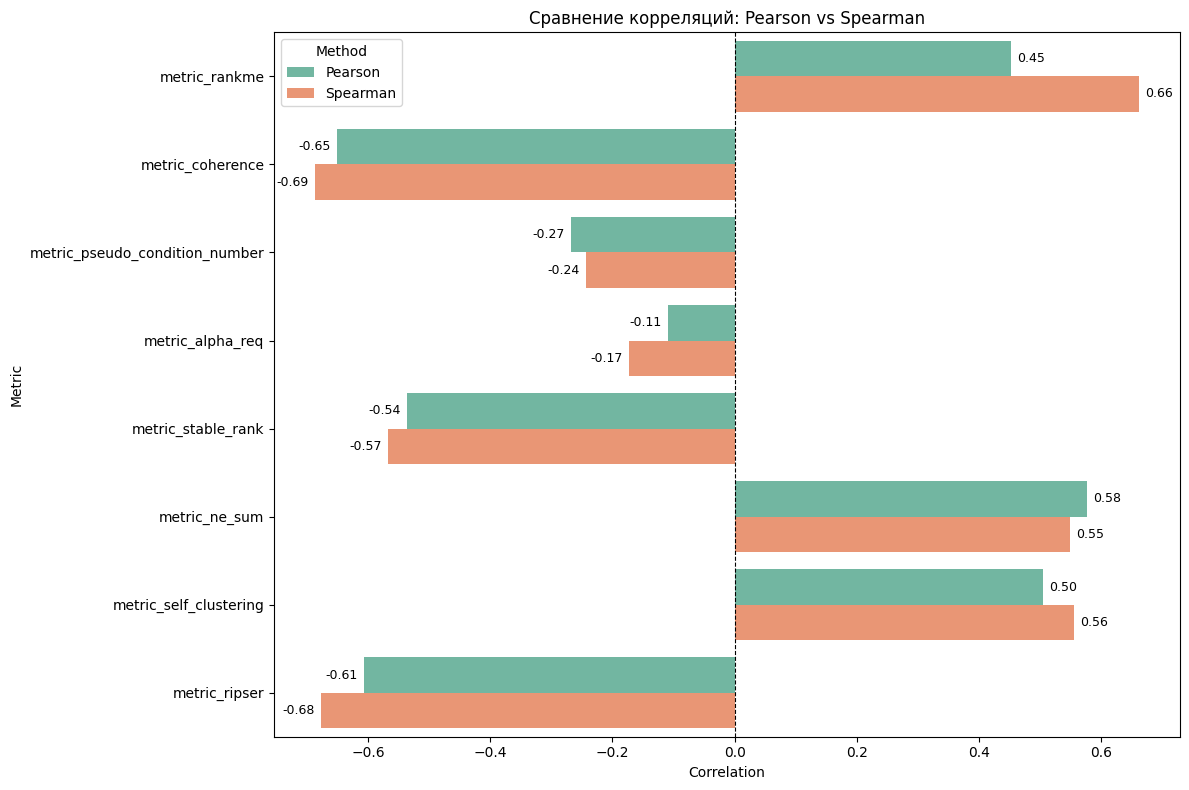

In [150]:
metrics = [col for col in df.columns if col.startswith("metric_")]

# Вычисляем обе корреляции
results = []
for metric in metrics:
    pearson_corr, _ = stats.pearsonr(df[metric], df["accuracy"])
    spearman_corr, _ = stats.spearmanr(df[metric], df["accuracy"])
    results.append({"metric": metric, "correlation": pearson_corr, "method": "Pearson"})
    results.append({"metric": metric, "correlation": spearman_corr, "method": "Spearman"})

corr_df = pd.DataFrame(results)

# Строим график
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=corr_df, x="correlation", y="metric", hue="method", palette="Set2")

# Добавим подписи прямо на столбцы
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(
            width + 0.01 if width > 0 else width - 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{width:.2f}",
            ha="left" if width > 0 else "right",
            va="center",
            fontsize=9,
            color="black"
        )

plt.title("Сравнение корреляций: Pearson vs Spearman")
plt.xlabel("Correlation")
plt.ylabel("Metric")
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend(title="Method")
plt.tight_layout()
plt.show()

### Смотрим на время посчета метрик

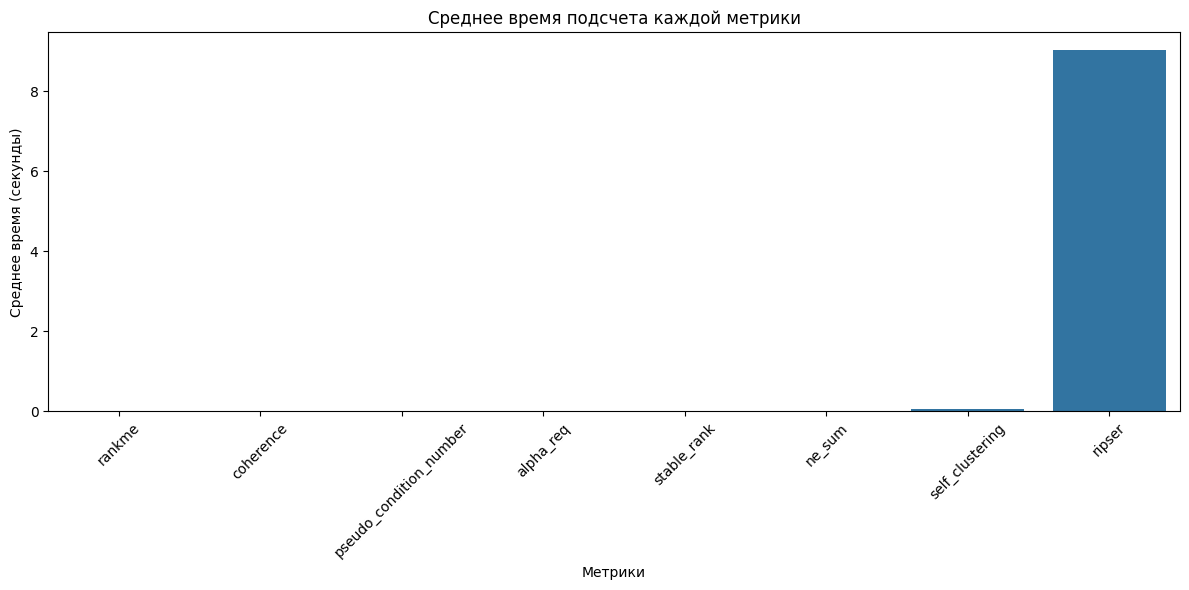

In [151]:
time_columns = [col for col in df.columns if col.startswith("time_")]
metrics = [col.replace("time_", "") for col in time_columns]

# Визуализация времени подсчета каждой метрики
plt.figure(figsize=(12, 6))
average_times = df[time_columns].mean()
sns.barplot(x=metrics, y=average_times)
plt.title("Среднее время подсчета каждой метрики")
plt.ylabel("Среднее время (секунды)")
plt.xlabel("Метрики")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

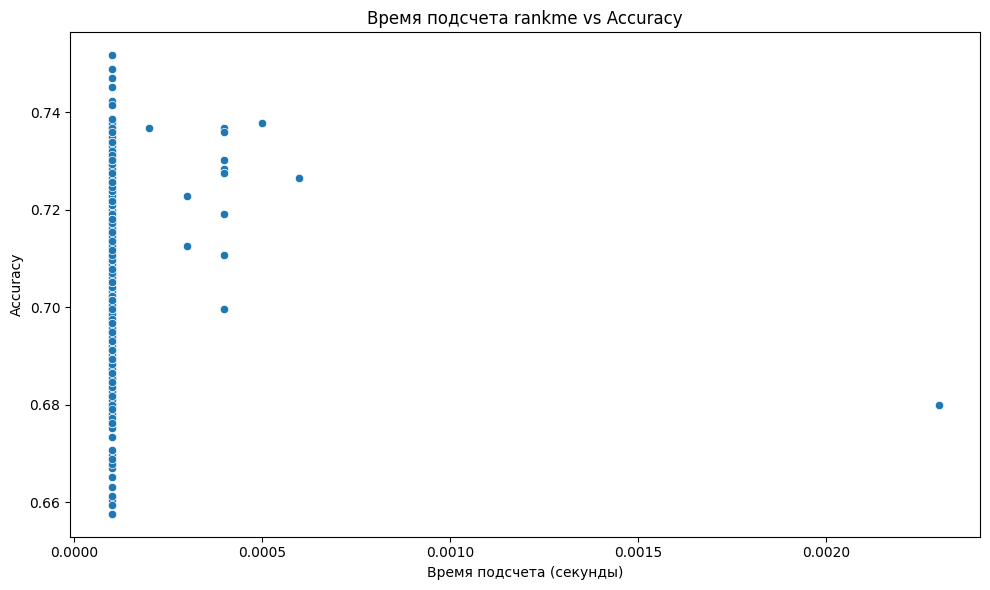

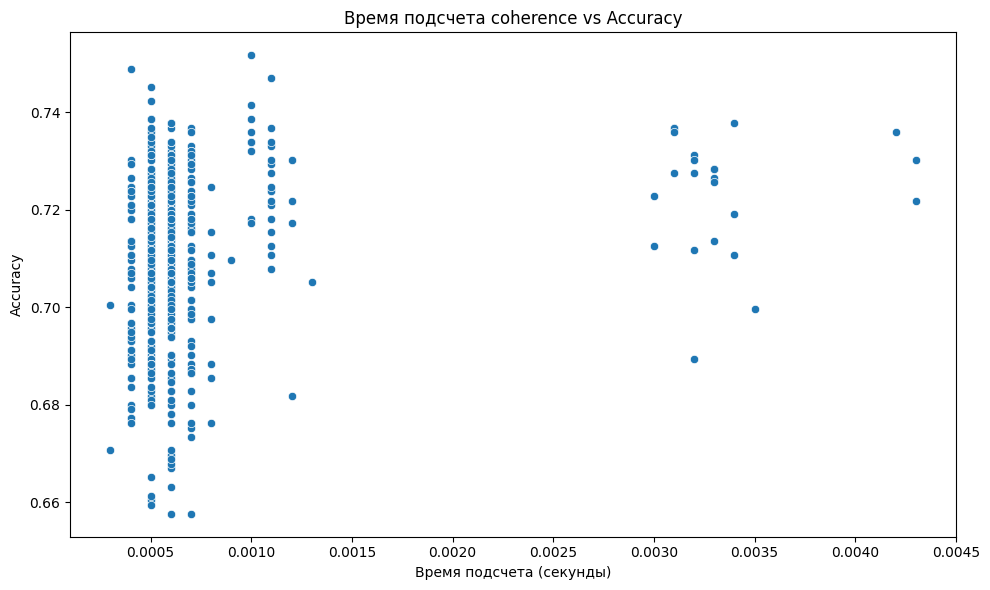

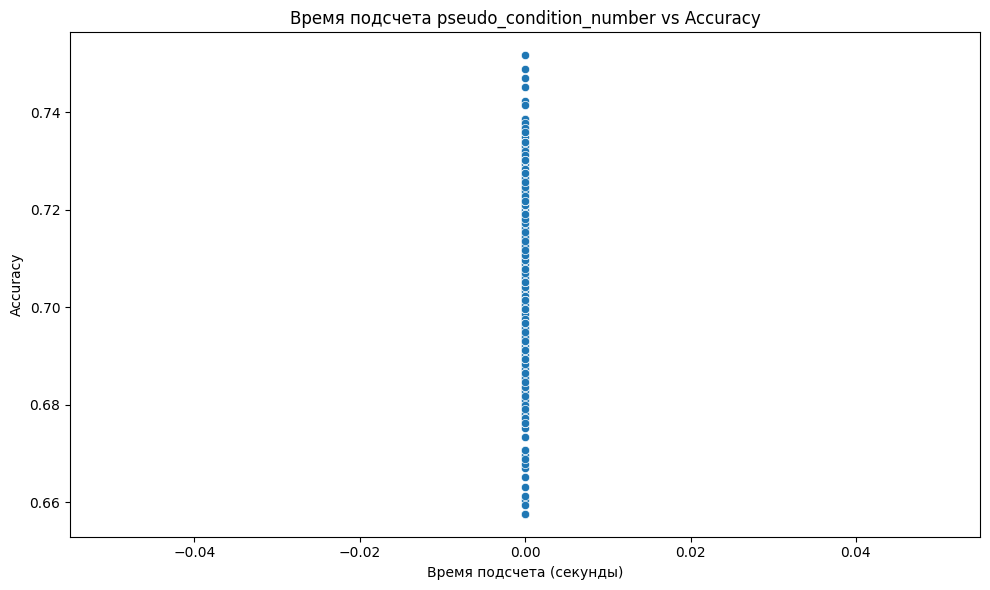

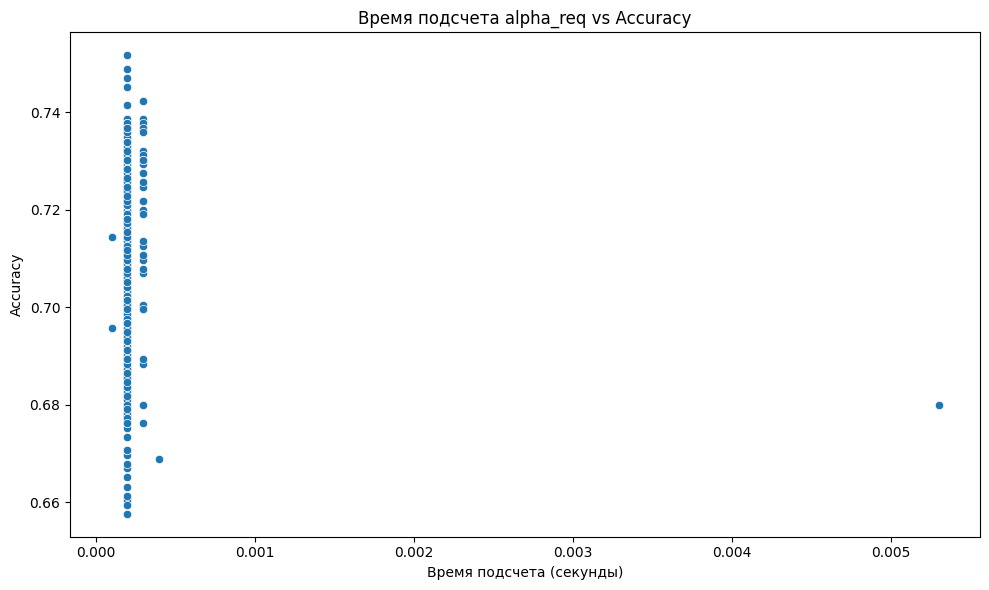

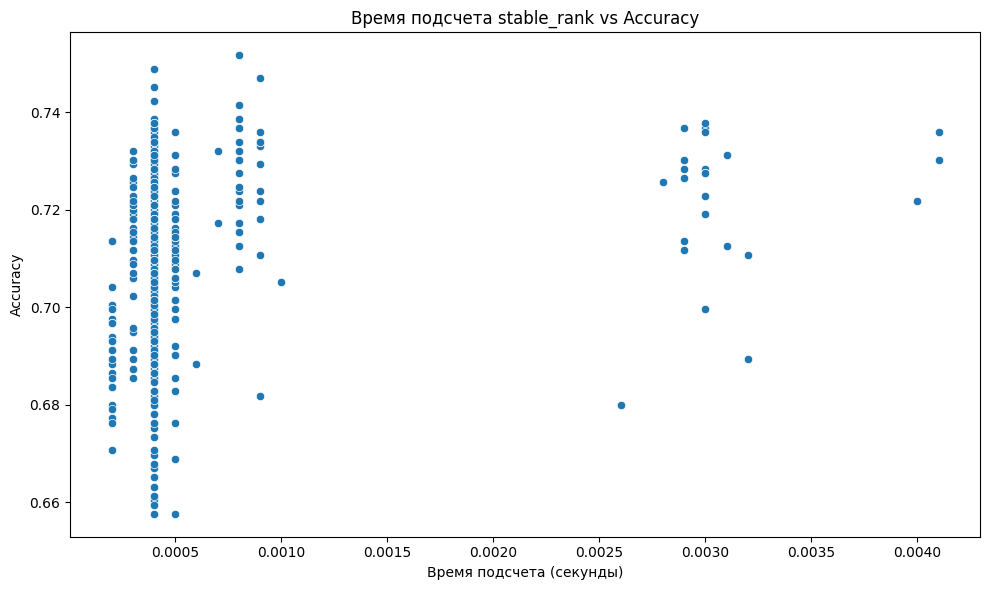

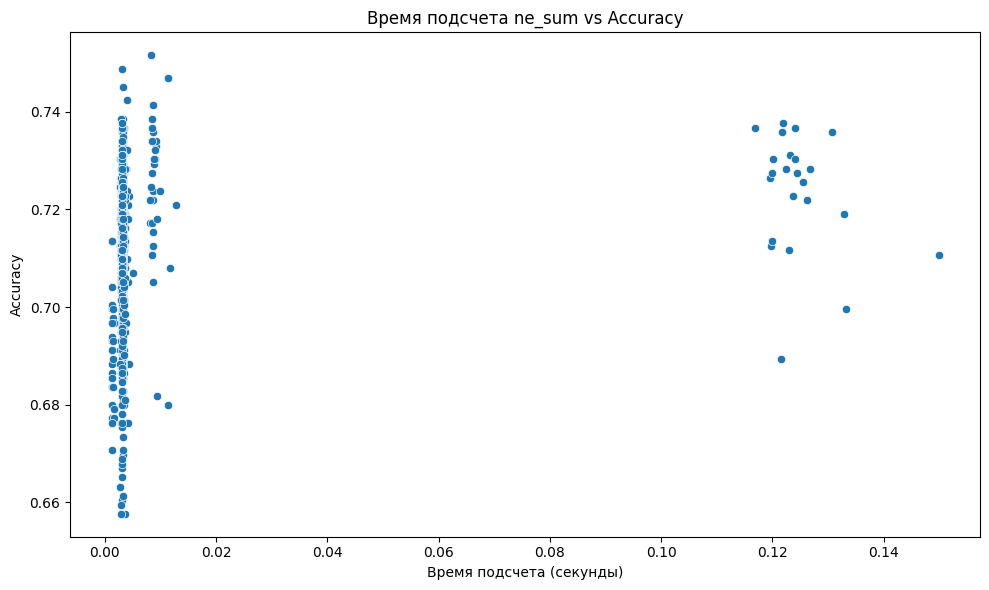

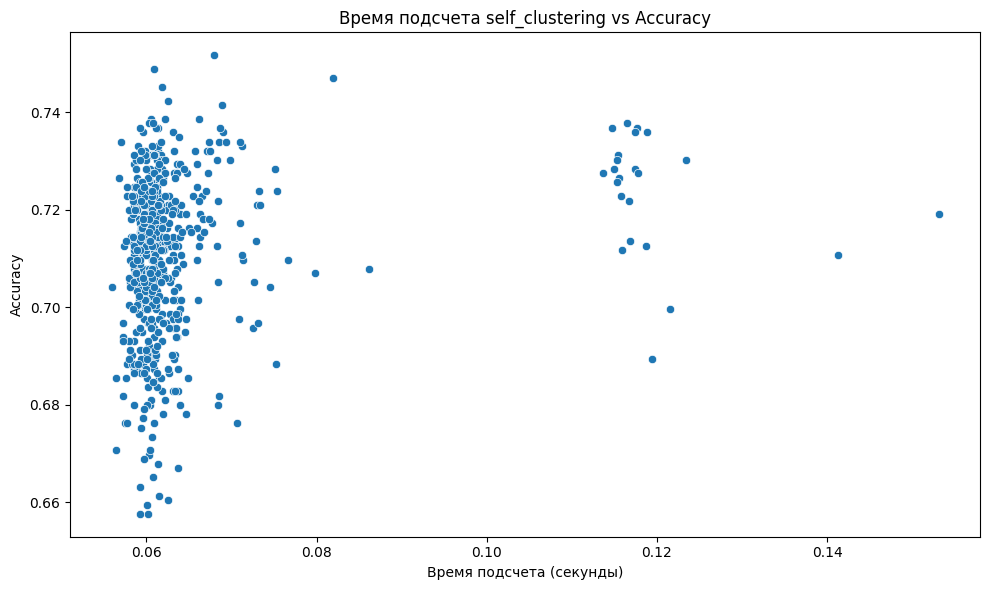

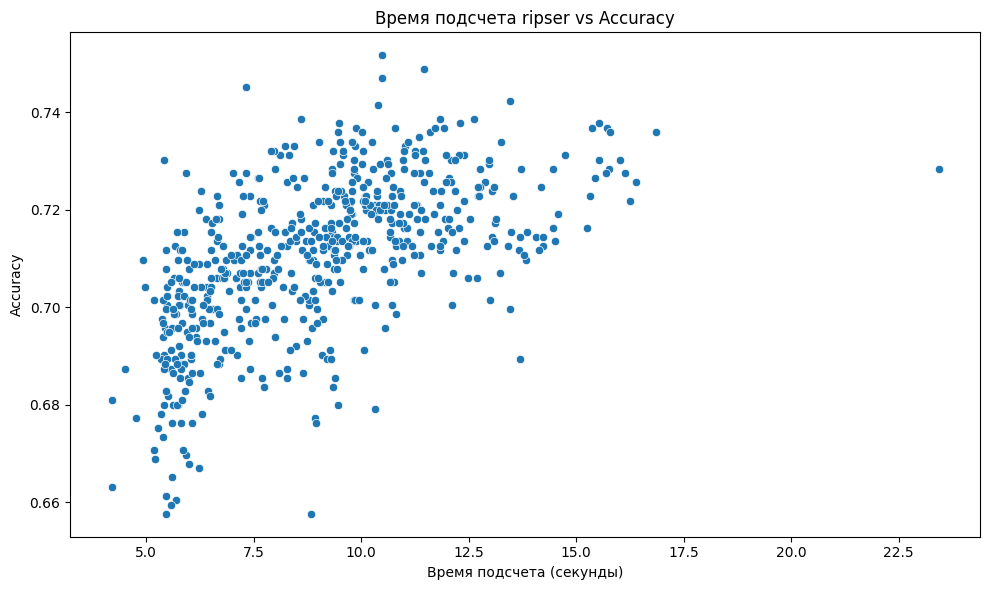

In [152]:
for time_col, metric_name in zip(time_columns, metrics):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[time_col], y=df["accuracy"])
    plt.title(f"Время подсчета {metric_name} vs Accuracy")
    plt.xlabel("Время подсчета (секунды)")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

<ipython-input-153-6a3d778cd9b1>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[time_col], label=metric_name, fill=True, alpha=0.4)


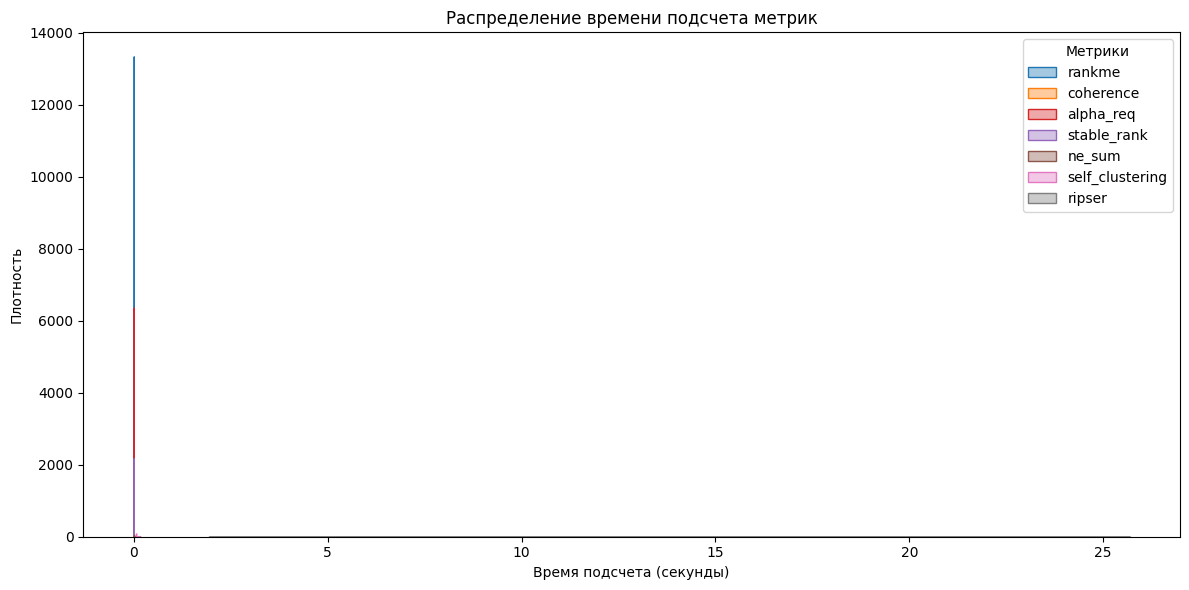

In [153]:
plt.figure(figsize=(12, 6))
for time_col, metric_name in zip(time_columns, metrics):
    sns.kdeplot(df[time_col], label=metric_name, fill=True, alpha=0.4)
plt.title("Распределение времени подсчета метрик")
plt.xlabel("Время подсчета (секунды)")
plt.ylabel("Плотность")
plt.legend(title="Метрики")
plt.tight_layout()
plt.show()

## Попарная корреляция между метриками

In [155]:
metric_columns = [col for col in df.columns if col.startswith("metric_")]

In [156]:
df["dataset_type"] = df["epoch_num"].apply(lambda x: "Train" if x < df["epoch_num"].max() * 0.8 else "Validation")

In [ ]:
metrics = [col for col in df.columns if col.startswith("metric_")]  

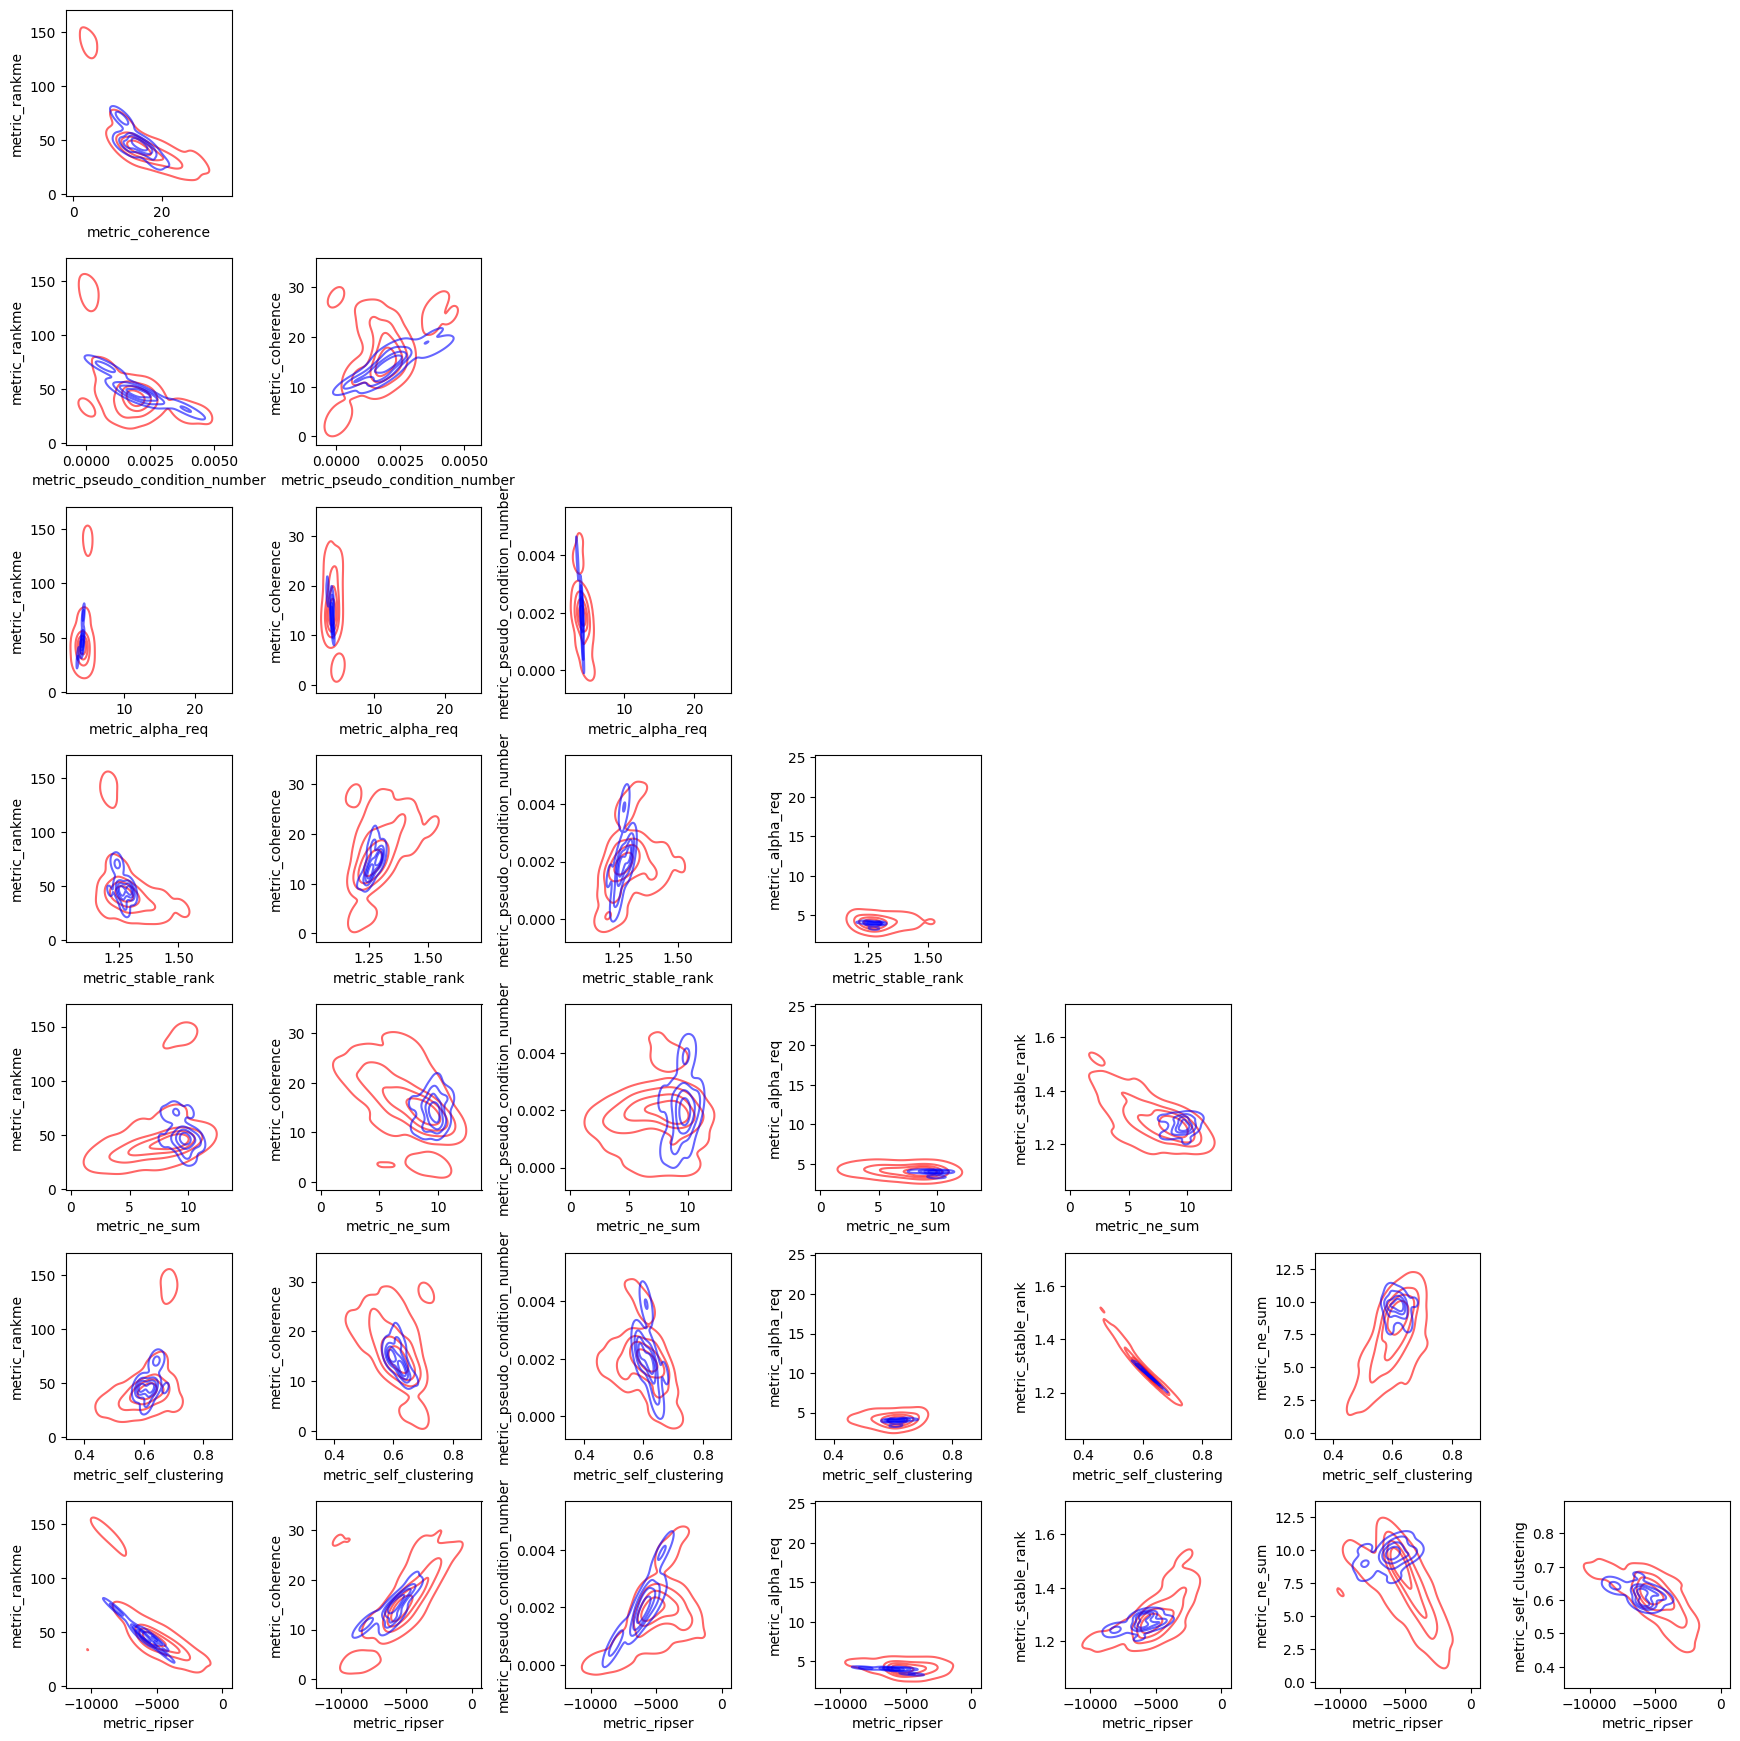

In [ ]:
fig, axes = plt.subplots(len(metrics), len(metrics), figsize=(20, 20))

for i, metric_x in enumerate(metrics):
    for j, metric_y in enumerate(metrics):
        ax = axes[i, j]
        if i > j:  
            sns.kdeplot(
                x=df.loc[df["dataset_type"] == "Train", metric_x],
                y=df.loc[df["dataset_type"] == "Train", metric_y],
                levels=5, color="red", ax=ax, alpha=0.6
            )
            sns.kdeplot(
                x=df.loc[df["dataset_type"] == "Validation", metric_x],
                y=df.loc[df["dataset_type"] == "Validation", metric_y],
                levels=5, color="blue", ax=ax, alpha=0.6
            )
        else:
            ax.set_visible(False)

plt.tight_layout()
plt.show()
